In [2]:
import gym
import torch
import gym_nav
import numpy as np

import sys
sys.path.append('../')
from evaluation import *
from model_evaluation import *
from trajectories import *
from shortcut_analysis import *
from explore_analysis import *
from plotting_utils import *

from tqdm import tqdm
from umap import UMAP
from scipy.stats import wasserstein_distance
chks = np.arange(40, 460, 40)
pplt.rc.reset()

# Visualize agent visual inputs

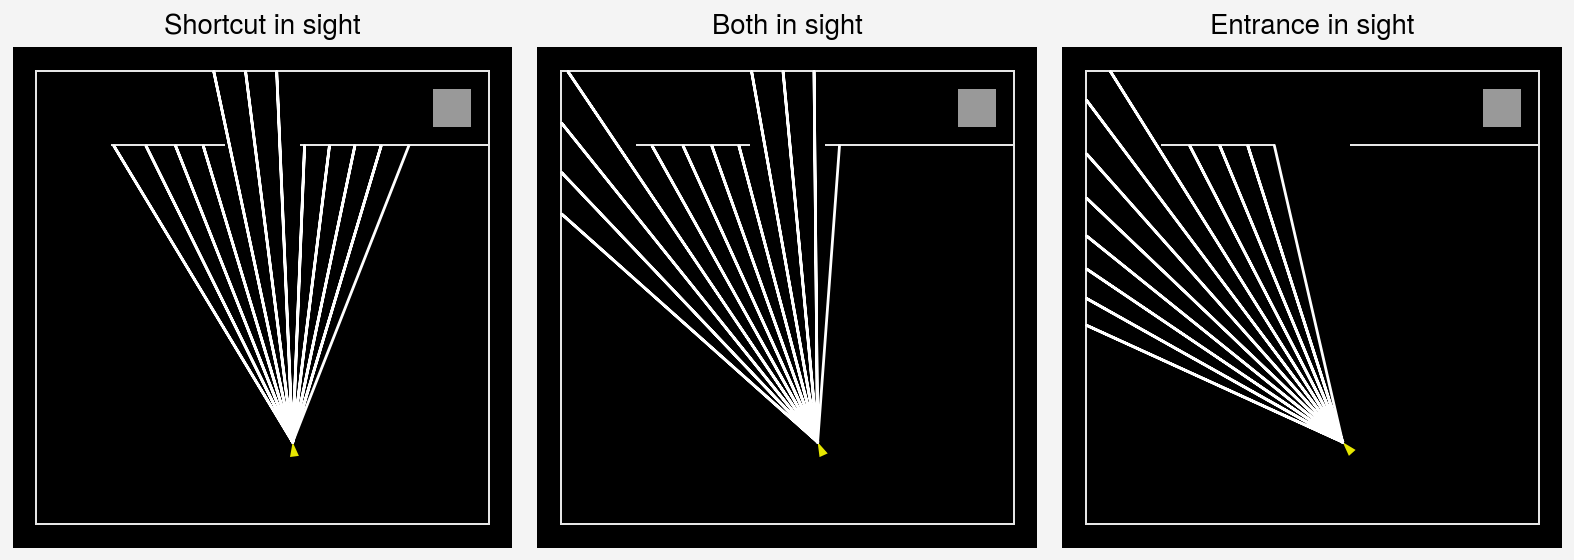

In [54]:
set_trajectory_plot_style()
env = gym.make('ShortcutNav-v0', wall_colors=1.5, shortcut_probability=1)
env.seed(20)

fig, ax = pplt.subplots(ncols=3)
obs = env.reset()
dists1 = obs[-12:]
env.render('human', ax=ax[0])

obs, _, _, _  = env.step(2)
dists2 = obs[-12:]
env.render('human', ax=ax[1])

obs, _, _, _  = env.step(2)
dists3 = obs[-12:]
env.render('human', ax=ax[2])

ax.format(title=['Shortcut in sight', 'Both in sight', 'Entrance in sight'])

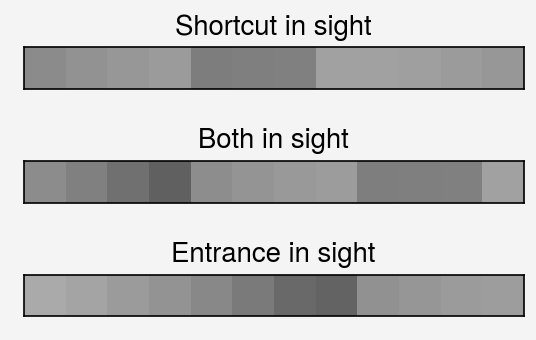

In [60]:
pplt.rc.reset()
fig, ax = pplt.subplots(nrows=3)
ax[0].imshow(np.flip(dists1)[np.newaxis, :], cmap='greys', vmin=0, vmax=1)
ax[1].imshow(np.flip(dists2)[np.newaxis, :], cmap='greys', vmin=0, vmax=1)
ax[2].imshow(np.flip(dists3)[np.newaxis, :], cmap='greys', vmin=0, vmax=1)

ax.format(xticks=[], yticks=[], title=['Shortcut in sight', 'Both in sight', 'Entrance in sight'])

In [62]:
set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=2)
env = gym.make('ShortcutNav-v0', wall_colors=1.5, shortcut_probability=1)
env.seed(20)
obs = env.reset()
dists1 = obs[-12:]
env.render('human', ax=ax[0])

env = gym.make('ShortcutNav-v0', wall_colors=1.5, shortcut_probability=0)
env.seed(20)
obs = env.reset()
dists2 = obs[-12:]
env.render('human', ax=ax[1])

ax.format(title=['Shortcut open', 'Shortcut closed'])

In [68]:
dists2_copy = dists2.copy()
dists2_copy[:5] = np.nan
dists2_copy[8:] = np.nan

pplt.rc.reset()
fig, ax = pplt.subplots(nrows=2)
ax[0].imshow(np.flip(dists1)[np.newaxis, :], cmap='greys', vmin=0, vmax=1)
ax[1].imshow(np.flip(dists2)[np.newaxis, :], cmap='greys', vmin=0, vmax=1)
ax[1].imshow(np.flip(dists2_copy)[np.newaxis, :], cmap='PuRd', vmin=0, vmax=1)

ax.format(xticks=[], yticks=[], title=['Shortcut open', 'Shortcut closed'])

# 3-step wasserstein scores

## Wasserstein example

Example visualizing what wasserestein measure looks like and the resulting distance scores we get out of it

In [117]:
activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

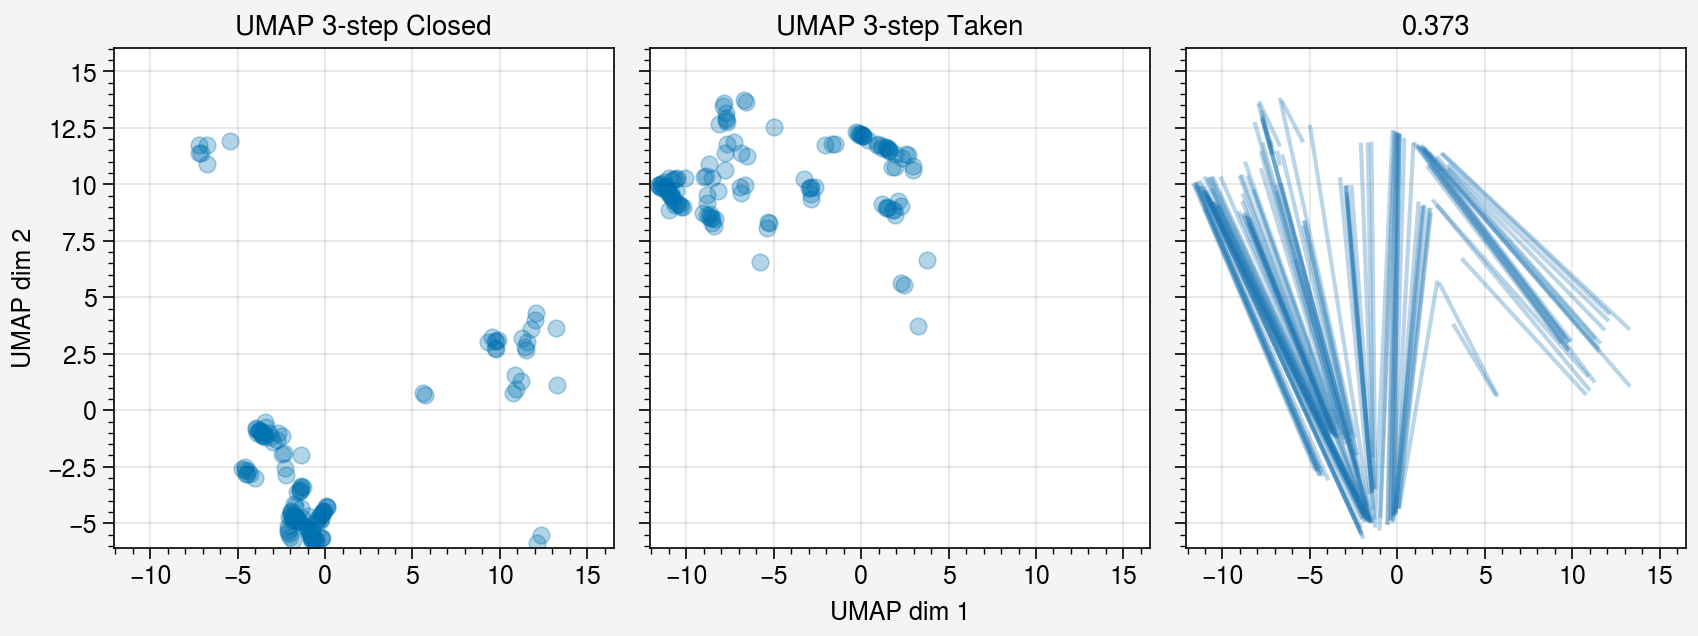

In [7]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

ax = plot_two_cloud_wasserstein(X1, X3, all_data=activ2d)

ax[0].format(title='UMAP 3-step Closed')
ax[1].format(title='UMAP 3-step Taken')
ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

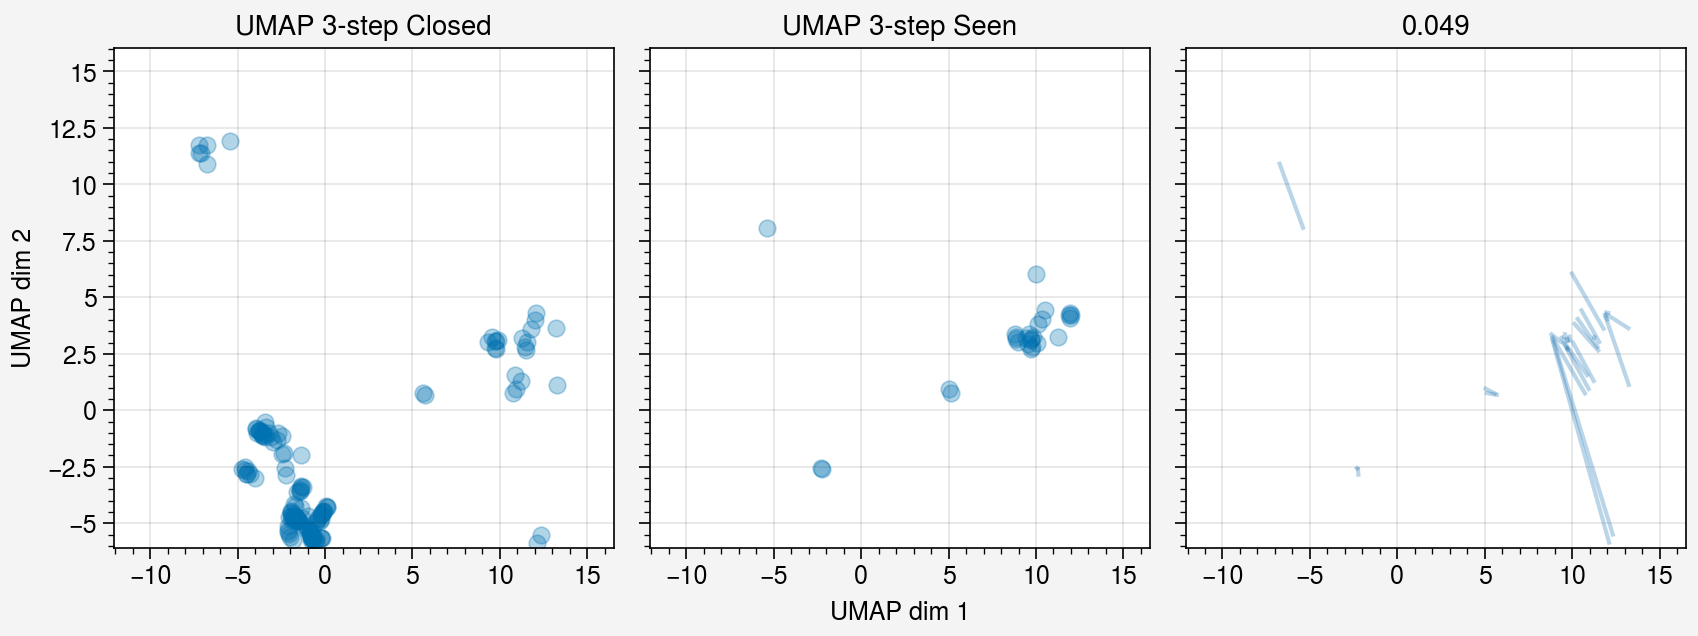

In [8]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

ax = plot_two_cloud_wasserstein(X1, X2, all_data=activ2d)

ax[0].format(title='UMAP 3-step Closed')
ax[1].format(title='UMAP 3-step Seen')
ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

In [144]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

ax, dist = plot_two_cloud_wasserstein(X1, X3, all_data=activ2d, one_ax=True,
                                     colors=[rgb_colors[0], rgb_colors[2]])
ax.format(title=f'Closed vs. Taken Wasserstein: {dist:.3f}',
         xlabel='UMAP dim 1', ylabel='UMAP dim 2')
# ax[0].format(title='UMAP 3-step Closed')
# ax[1].format(title='UMAP 3-step Taken')
# ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

In [145]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

ax, dist = plot_two_cloud_wasserstein(X2, X3, all_data=activ2d, one_ax=True,
                                     colors=[rgb_colors[1], rgb_colors[2]])
ax.format(title=f'Seen vs. Taken Wasserstein: {dist:.3f}',
         xlabel='UMAP dim 1', ylabel='UMAP dim 2')
# ax[0].format(title='UMAP 3-step Closed')
# ax[1].format(title='UMAP 3-step Taken')
# ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

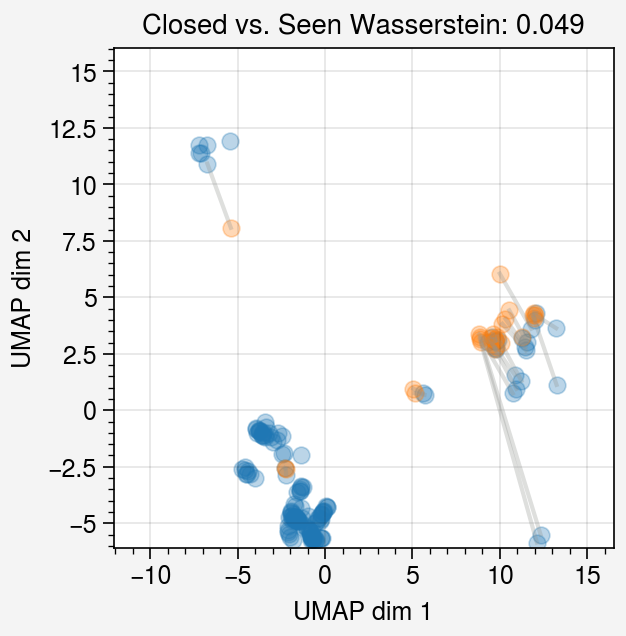

In [146]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

ax, dist = plot_two_cloud_wasserstein(X1, X2, all_data=activ2d, one_ax=True,
                                     colors=[rgb_colors[0], rgb_colors[1]])
ax.format(title=f'Closed vs. Seen Wasserstein: {dist:.3f}',
         xlabel='UMAP dim 1', ylabel='UMAP dim 2')
# ax[0].format(title='UMAP 3-step Closed')
# ax[1].format(title='UMAP 3-step Taken')
# ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

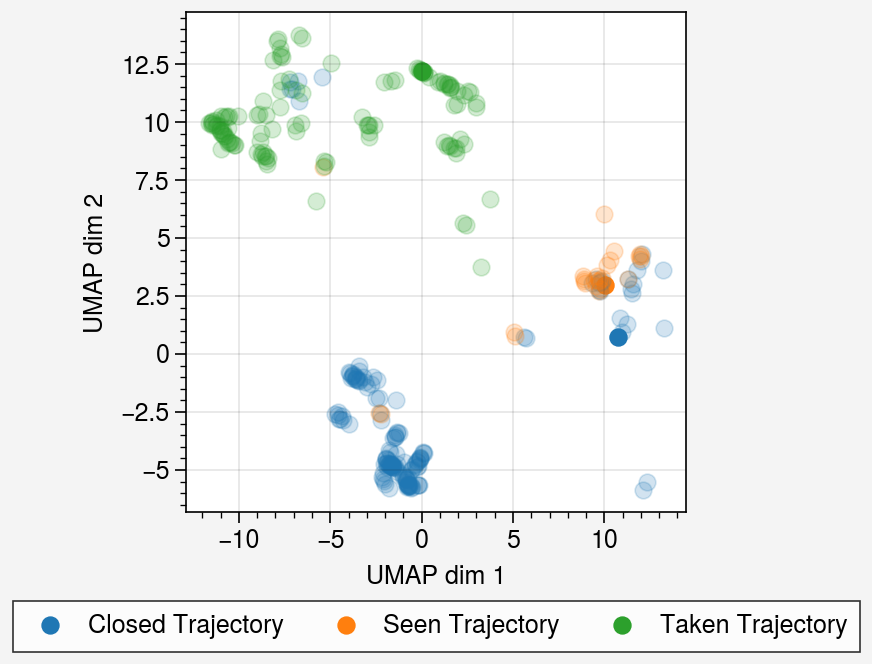

In [127]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

fig, ax = pplt.subplots()

ax.scatter(X1[0, 0], X1[0, 1], alpha=1, label='Closed Trajectory', color=rgb_colors[0])
ax.scatter(X2[0, 0], X2[0, 1], alpha=1, label='Seen Trajectory', color=rgb_colors[1])
ax.scatter(X3[0, 0], X3[0, 1], alpha=1, label='Taken Trajectory', color=rgb_colors[2])

ax.scatter(X1[:, 0], X1[:, 1], alpha=0.2, color=rgb_colors[0])
ax.scatter(X2[:, 0], X2[:, 1], alpha=0.2, color=rgb_colors[1])
ax.scatter(X3[:, 0], X3[:, 1], alpha=0.2, color=rgb_colors[2])

ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

ax.legend(loc='b')
# ax[0].format(title='UMAP 3-step Closed')
# ax[1].format(title='UMAP 3-step Taken')
# ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

In [139]:
p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
color = vision_decision_coloring(vis, avail, used, end=3)

X1 = activ2d[color==0]
X2 = activ2d[color==1]
X3 = activ2d[color==2]

fig, ax = pplt.subplots()

ax.scatter(activ2d[:,0], activ2d[:,1], alpha=0.1)
ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2',
         title=f'p=0.4, late training, shortcut use {np.sum(used)/50:.2f}')
# ax[0].format(title='UMAP 3-step Closed')
# ax[1].format(title='UMAP 3-step Taken')
# ax.format(xlabel='UMAP dim 1', ylabel='UMAP dim 2')

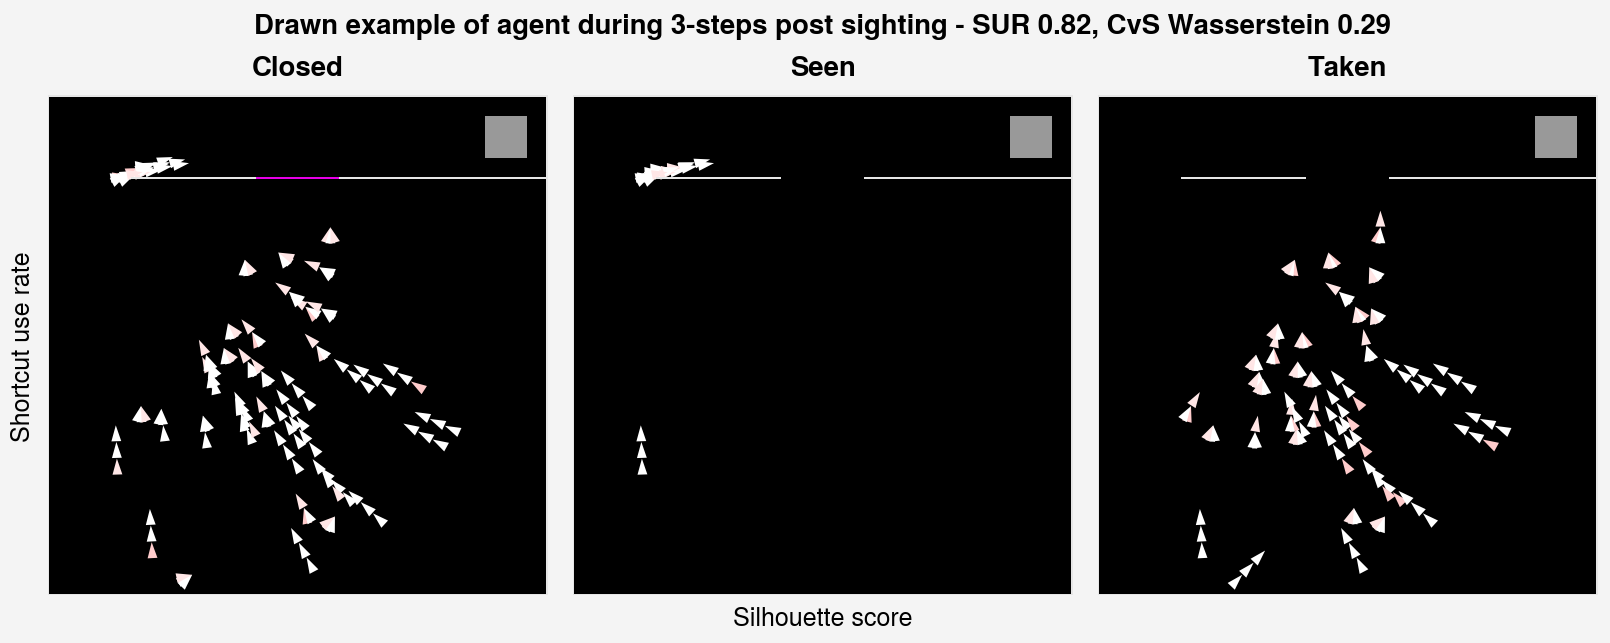

In [138]:

p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
angle = np.vstack(res['angle'])
color = vision_decision_coloring(vis, avail, used, end=3)

sur = np.sum(used) / 50
silscore, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)


c_p = pos[color == 0]
s_p = pos[color == 1]
t_p = pos[color == 2]
c_a = angle[color == 0]
s_a = angle[color == 1]
t_a = angle[color == 2]

set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=3)

draw_trajectory(c_p, c_a, ax=ax[0], color_first=False, color_last=False)
draw_trajectory(s_p, s_a, ax=ax[1], color_first=False, color_last=False)
draw_trajectory(t_p, t_a, ax=ax[2], color_first=False, color_last=False)

draw_shortcut_maze(ax=ax[0], shortcut_open=False)
draw_shortcut_maze(ax=ax[1])
draw_shortcut_maze(ax=ax[2])


leftlabels = ['Closed', 'Seen', 'Taken']
ax.format(xlabel='Silhouette score', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle=f'Drawn example of agent during 3-steps post sighting - SUR {sur:.2f}, CvS Wasserstein {silscore:.2f}',
         xlim=[0, 300], ylim=[0, 300])

pplt.rc.reset()

## Policy

### wc1.5

In [41]:
activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

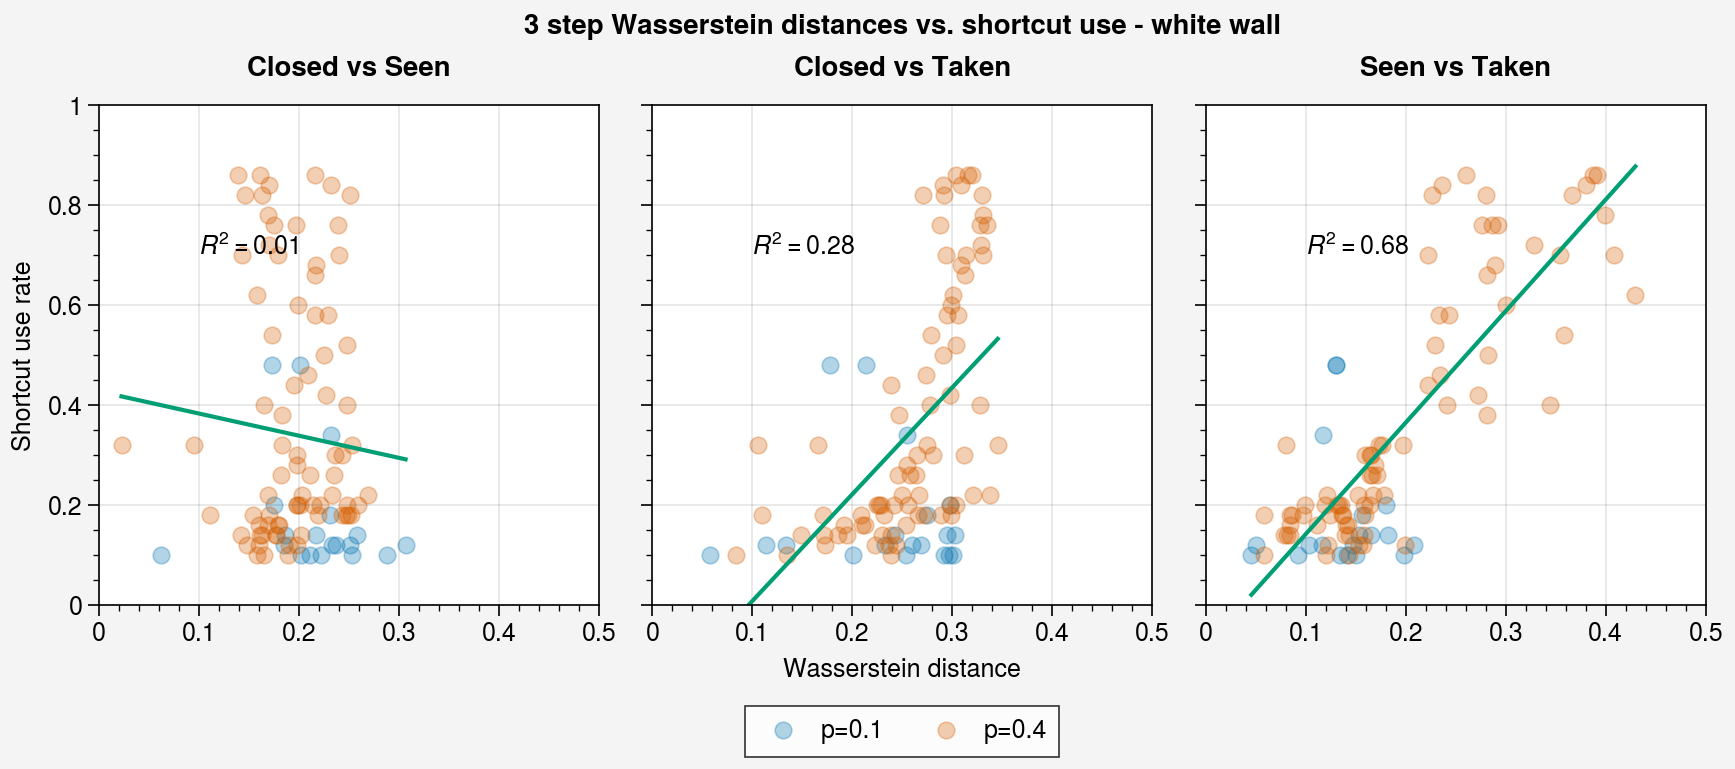

In [50]:
probs = [0.1, 0.4]
trials = range(10)

fig, ax = pplt.subplots(ncols=3)
legend_pts = []

comb_none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
comb_none_vs_taken = [] #no shortcut avail vs shortcut used
comb_vis_vs_taken = [] #shortcut avail but not used vs shortcut used
comb_surs = []

for p in probs:
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used
    surs = []
    for chk in range(len(chks)):
        for t in trials:
            key = f'{p}_{t}'
            shortcut_res = activs[key]

            res = shortcut_res[chk]
            vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
            if np.sum(used) < 5:
                continue
            activ = np.vstack(activ)

            color = vision_decision_coloring(vis, avail, used, end=3)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==1], all_data=activ)
            none_vs_vis.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)
            none_vs_taken.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==1], activ[color==2], all_data=activ)
            vis_vs_taken.append(score)
            surs.append(np.sum(used) / 50)

    keys = ['none_vs_vis', 'none_vs_taken', 'vis_vs_taken']
    for i, key in enumerate(keys):
        pts = ax[i].scatter(globals()[key], surs, label=f'p={p}', alpha=0.3)
        if i == 0:
            legend_pts.append(pts)
        
    comb_none_vs_vis += none_vs_vis
    comb_none_vs_taken += none_vs_taken
    comb_vis_vs_taken += vis_vs_taken
    comb_surs += surs

keys = ['comb_none_vs_vis', 'comb_none_vs_taken', 'comb_vis_vs_taken']
for i, key in enumerate(keys):
    x, y, r2 = linear_bestfit(globals()[key], comb_surs)
    ax[i].plot(x, y)
    ax[i].text(0.1, 0.7, f'$R^2={r2:.2f}$')

leftlabels = ['Closed vs Seen', 'Closed vs Taken', 'Seen vs Taken']        
ax.format(xlabel='Wasserstein distance', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle='3 step Wasserstein distances vs. shortcut use - white wall',
         xlim=[0, 0.5], ylim=[0, 1])
fig.legend(legend_pts, loc='b')

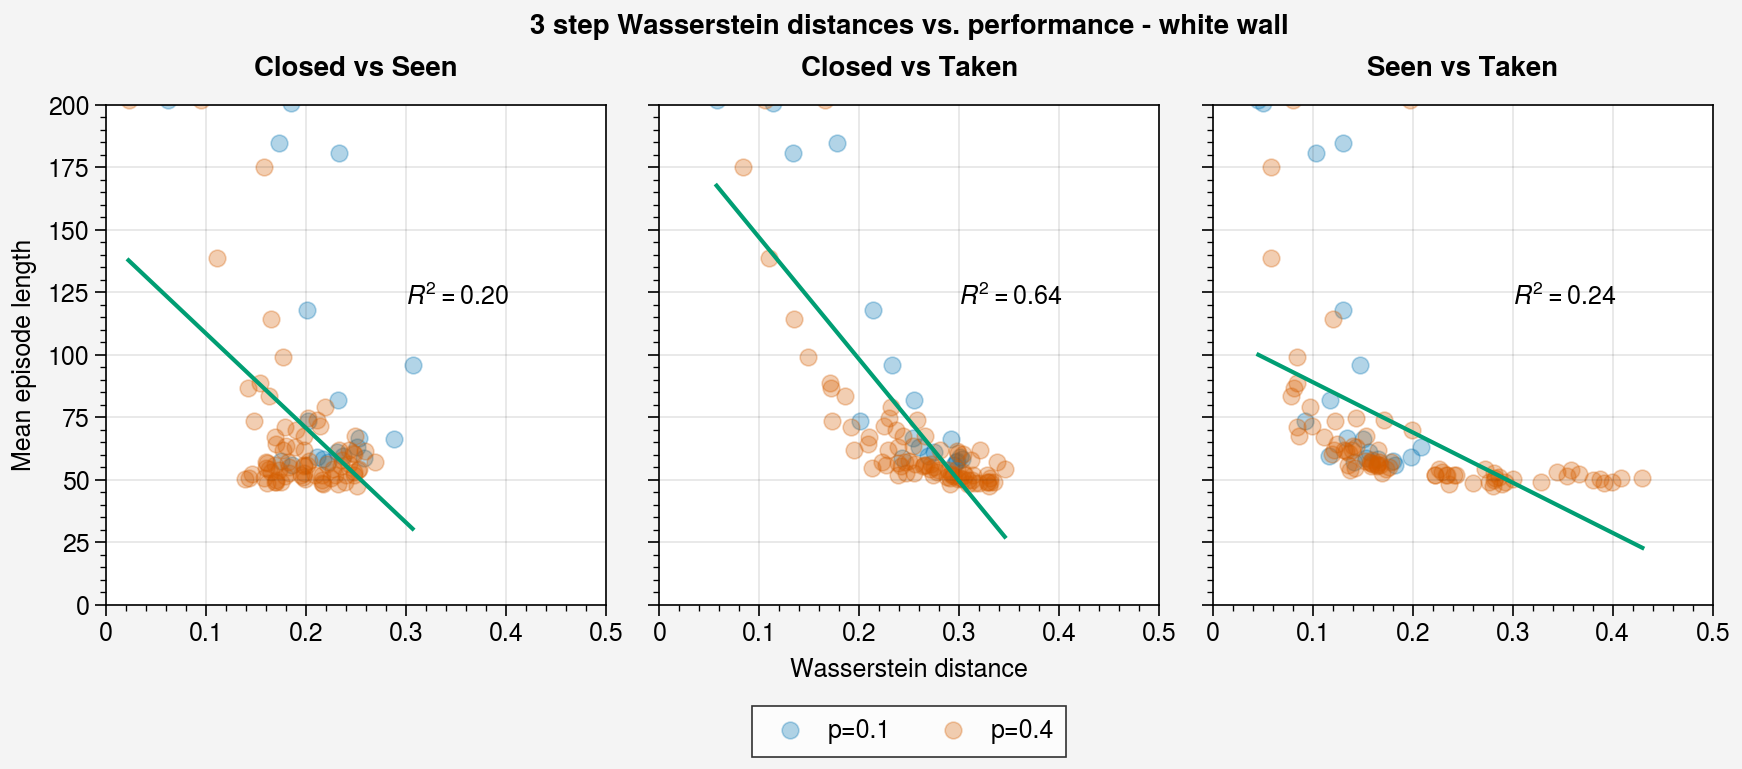

In [49]:
probs = [0.1, 0.4]
trials = range(10)

fig, ax = pplt.subplots(ncols=3)
legend_pts = []

comb_none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
comb_none_vs_taken = [] #no shortcut avail vs shortcut used
comb_vis_vs_taken = [] #shortcut avail but not used vs shortcut used
comb_lens = []

for p in probs:
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used
    lens = []
    for chk in range(len(chks)):
        for t in trials:
            key = f'{p}_{t}'
            shortcut_res = activs[key]

            res = shortcut_res[chk]
            vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
            if np.sum(used) < 5:
                continue
            activ = np.vstack(activ)

            color = vision_decision_coloring(vis, avail, used, end=3)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==1], all_data=activ)
            none_vs_vis.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)
            none_vs_taken.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==1], activ[color==2], all_data=activ)
            vis_vs_taken.append(score)
            lens.append(np.mean(get_ep_lens(res['pos'])))

    keys = ['none_vs_vis', 'none_vs_taken', 'vis_vs_taken']
    for i, key in enumerate(keys):
        pts = ax[i].scatter(globals()[key], lens, label=f'p={p}', alpha=0.3)
        if i == 0:
            legend_pts.append(pts)
        
    comb_none_vs_vis += none_vs_vis
    comb_none_vs_taken += none_vs_taken
    comb_vis_vs_taken += vis_vs_taken
    comb_lens += lens

keys = ['comb_none_vs_vis', 'comb_none_vs_taken', 'comb_vis_vs_taken']
for i, key in enumerate(keys):
    x, y, r2 = linear_bestfit(globals()[key], comb_lens)
    ax[i].plot(x, y)
    ax[i].text(0.3, 120, f'$R^2={r2:.2f}$')

leftlabels = ['Closed vs Seen', 'Closed vs Taken', 'Seen vs Taken']        
ax.format(xlabel='Wasserstein distance', ylabel='Mean episode length',
         toplabels=leftlabels,
         suptitle='3 step Wasserstein distances vs. performance - white wall',
         xlim=[0, 0.5], ylim=[0, 200])
fig.legend(legend_pts, loc='b')

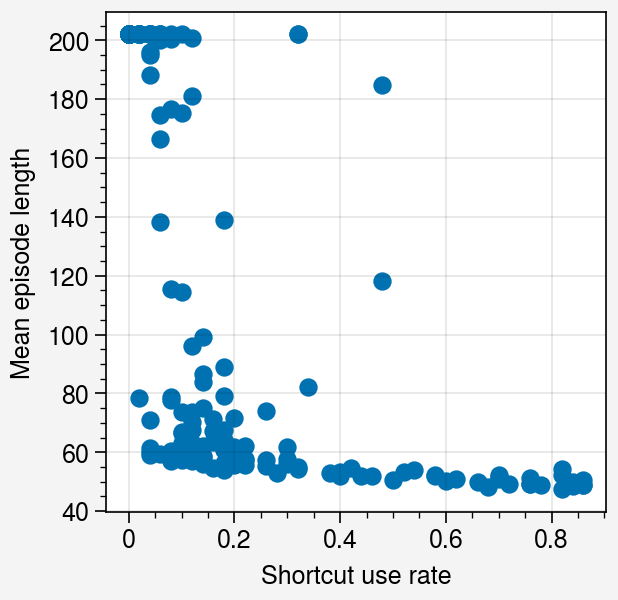

In [55]:
fig, ax = pplt.subplots()

lens = []
surs = []
for p, t in itertools.product(probs, trials):
    for chk in range(len(chks)):
        key = f'{p}_{t}'
        
        res = activs[key][chk]
        used = res['shortcut_used']

        surs.append(np.sum(used) / 50)
        lens.append(np.mean(get_ep_lens(res['pos'])))

ax.scatter(surs, lens)
ax.format(xlabel='Shortcut use rate', ylabel='Mean episode length')

### wc4

In [12]:
activs = pickle.load(open('data/shortcut/wc4_policy_moreagents/shared1_activ', 'rb'))

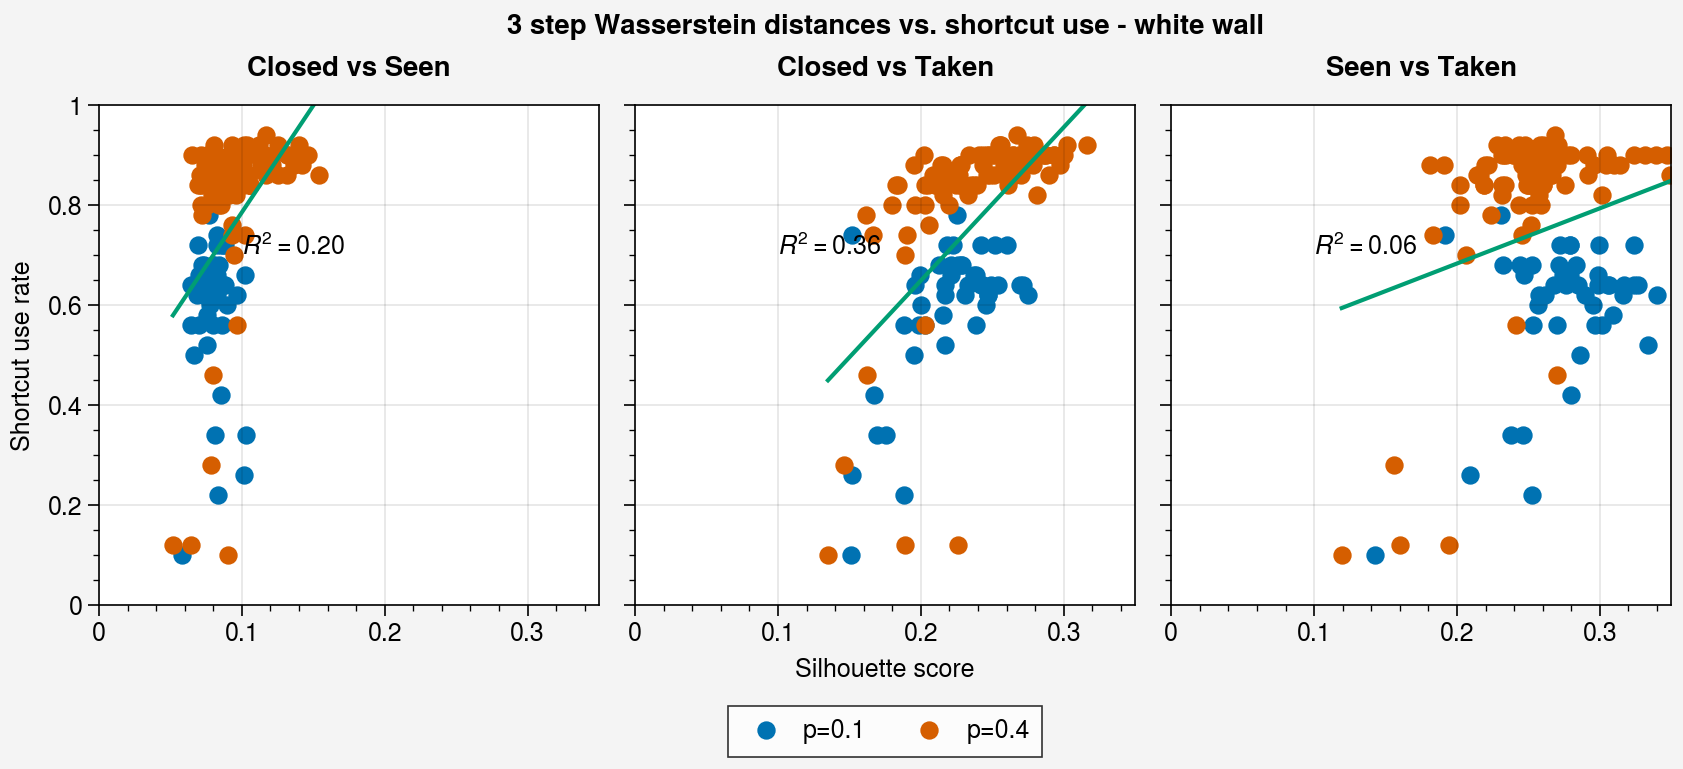

In [15]:
probs = [0.1, 0.4]
trials = range(10)

fig, ax = pplt.subplots(ncols=3)
legend_pts = []

comb_none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
comb_none_vs_taken = [] #no shortcut avail vs shortcut used
comb_vis_vs_taken = [] #shortcut avail but not used vs shortcut used
comb_surs = []

for p in probs:
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used
    surs = []
    for chk in range(len(chks)):
        for t in trials:
            key = f'{p}_{t}'
            shortcut_res = activs[key]

            res = shortcut_res[chk]
            vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
            if np.sum(used) < 5:
                continue
            activ = np.vstack(activ)

            color = vision_decision_coloring(vis, avail, used, end=3)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==1], all_data=activ)
            none_vs_vis.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)
            none_vs_taken.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==1], activ[color==2], all_data=activ)
            vis_vs_taken.append(score)
            surs.append(np.sum(used) / 50)

    keys = ['none_vs_vis', 'none_vs_taken', 'vis_vs_taken']
    for i, key in enumerate(keys):
        pts = ax[i].scatter(globals()[key], surs, label=f'p={p}')
        if i == 0:
            legend_pts.append(pts)
        
    comb_none_vs_vis += none_vs_vis
    comb_none_vs_taken += none_vs_taken
    comb_vis_vs_taken += vis_vs_taken
    comb_surs += surs

keys = ['comb_none_vs_vis', 'comb_none_vs_taken', 'comb_vis_vs_taken']
for i, key in enumerate(keys):
    x, y, r2 = linear_bestfit(globals()[key], comb_surs)
    ax[i].plot(x, y)
    ax[i].text(0.1, 0.7, f'$R^2={r2:.2f}$')

leftlabels = ['Closed vs Seen', 'Closed vs Taken', 'Seen vs Taken']        
ax.format(xlabel='Silhouette score', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle='3 step Wasserstein distances vs. shortcut use - white wall',
         xlim=[0, 0.35], ylim=[0, 1])
fig.legend(legend_pts, loc='b')

## Copied

### wc1.5

In [217]:
# activs = pickle.load(open('data/shortcut/wc1.5_copied_moreagents/shared1_activ', 'rb'))
activs = pickle.load(open('data/shortcut/wc1.5_copiedv2_moreagents/shared1_activ', 'rb'))
sur_activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

In [220]:
probs = [0.1, 0.4]
trials = range(10)

fig, ax = pplt.subplots(ncols=3)
legend_pts = []

comb_none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
comb_none_vs_taken = [] #no shortcut avail vs shortcut used
comb_vis_vs_taken = [] #shortcut avail but not used vs shortcut used
comb_surs = []

for p in probs:
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used
    surs = []
    for chk in range(len(chks)):
        for t in trials:
            key = f'{p}_{t}'
            shortcut_res = activs[key]

            res = shortcut_res[chk]
            vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
            used = sur_activs[key][chk]['shortcut_used']
            if np.sum(used) < 5:
                continue
            activ = np.vstack(activ)

            color = vision_decision_coloring(vis, avail, used, end=3)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==1], all_data=activ)
            none_vs_vis.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)
            none_vs_taken.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==1], activ[color==2], all_data=activ)
            vis_vs_taken.append(score)
            surs.append(np.sum(used) / 50)

    keys = ['none_vs_vis', 'none_vs_taken', 'vis_vs_taken']
    for i, key in enumerate(keys):
        pts = ax[i].scatter(globals()[key], surs, label=f'p={p}')
        if i == 0:
            legend_pts.append(pts)
        
    comb_none_vs_vis += none_vs_vis
    comb_none_vs_taken += none_vs_taken
    comb_vis_vs_taken += vis_vs_taken
    comb_surs += surs

keys = ['comb_none_vs_vis', 'comb_none_vs_taken', 'comb_vis_vs_taken']
for i, key in enumerate(keys):
    x, y, r2 = linear_bestfit(globals()[key], comb_surs)
    ax[i].plot(x, y)
    ax[i].text(0.07, 0.7, f'$R^2={r2:.2f}$')

leftlabels = ['Closed vs Seen', 'Closed vs Taken', 'Seen vs Taken']        
ax.format(xlabel='Wasserstein distance', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle='3 step Wasserstein distances vs. shortcut use - white wall (copied trajectories)',
         xlim=[0.04, 0.37], ylim=[0, 1])
fig.legend(legend_pts, loc='b')

### wc4

In [24]:
activs = pickle.load(open('data/shortcut/wc4_copied_moreagents/shared1_activ', 'rb'))
sur_activs = pickle.load(open('data/shortcut/wc4_policy_moreagents/shared1_activ', 'rb'))

In [27]:
probs = [0.1, 0.4]
trials = range(10)

fig, ax = pplt.subplots(ncols=3)
legend_pts = []

comb_none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
comb_none_vs_taken = [] #no shortcut avail vs shortcut used
comb_vis_vs_taken = [] #shortcut avail but not used vs shortcut used
comb_surs = []

for p in probs:
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used
    surs = []
    for chk in range(len(chks)):
        for t in trials:
            key = f'{p}_{t}'
            shortcut_res = activs[key]

            res = shortcut_res[chk]
            vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
            used = sur_activs[key][chk]['shortcut_used']
            if np.sum(used) < 5:
                continue
            activ = np.vstack(activ)

            color = vision_decision_coloring(vis, avail, used, end=3)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==1], all_data=activ)
            none_vs_vis.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)
            none_vs_taken.append(score)
            score, _, _ = two_cloud_wasserstein(activ[color==1], activ[color==2], all_data=activ)
            vis_vs_taken.append(score)
            surs.append(np.sum(used) / 50)

    keys = ['none_vs_vis', 'none_vs_taken', 'vis_vs_taken']
    for i, key in enumerate(keys):
        pts = ax[i].scatter(globals()[key], surs, label=f'p={p}')
        if i == 0:
            legend_pts.append(pts)
        
    comb_none_vs_vis += none_vs_vis
    comb_none_vs_taken += none_vs_taken
    comb_vis_vs_taken += vis_vs_taken
    comb_surs += surs

keys = ['comb_none_vs_vis', 'comb_none_vs_taken', 'comb_vis_vs_taken']
for i, key in enumerate(keys):
    x, y, r2 = linear_bestfit(globals()[key], comb_surs)
    ax[i].plot(x, y)
    ax[i].text(0.06, 0.7, f'$R^2={r2:.2f}$')

leftlabels = ['Closed vs Seen', 'Closed vs Taken', 'Seen vs Taken']        
ax.format(xlabel='Silhouette score', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle='3 step Wasserstein distances vs. shortcut use - white wall',
         xlim=[0.05, 0.28], ylim=[0, 1])
fig.legend(legend_pts, loc='b')

# Single agent analysis

Analyzing whether the positive correlation seen especially in Seen vs Taken is primarily due to the fact that in highly performant agents, Seen trajectories are usually only when the agent is already in the corridor that it sees the shortcut

In [214]:
activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

In [147]:
activs = pickle.load(open('data/shortcut/wc1.5_copied_moreagents/shared1_activ', 'rb'))

In [204]:
# only consider agents that used shortcut at least 5 times

probs = [0.1, 0.4]
# probs = [0.4]
trials = range(10)

rows = []
for p in probs:
    for chk in range(len(chks)):
        for t in trials:
            key = f'{p}_{t}'
            shortcut_res = activs[key]

            res = shortcut_res[chk]
            vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
            if np.sum(used) < 5:
                continue
            activ = np.vstack(activ)

            color = vision_decision_coloring(vis, avail, used, end=3)
            none_vs_vis, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==1], all_data=activ)
            none_vs_taken, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)
            vis_vs_taken, _, _ = two_cloud_wasserstein(activ[color==1], activ[color==2], all_data=activ)
            sur = (np.sum(used) / 50)
    
            rows.append({
                'key': key,
                'chk': chk,
                'none_vs_vis': none_vs_vis,
                'none_vs_taken': none_vs_taken,
                'vis_vs_taken': vis_vs_taken,
                'sur': sur
            })
df = pd.DataFrame(rows)

In [205]:
df[df['vis_vs_taken'] > 0.4]

key  chk  none_vs_vis  none_vs_taken  vis_vs_taken   sur
75  0.4_4    8     0.158229       0.300963      0.429606  0.62
84  0.4_4    9     0.143450       0.330634      0.408221  0.70

In [159]:
df[(df['sur'] > 0.5) & (df['sur'] < 0.6)]

key  chk  none_vs_vis  none_vs_taken  vis_vs_taken   sur
44  0.4_1    5     0.172981       0.278117      0.358745  0.54
60  0.4_8    6     0.247653       0.304061      0.229196  0.52
70  0.4_8    7     0.229056       0.306044      0.232783  0.58
78  0.4_8    8     0.216387       0.294875      0.243297  0.58

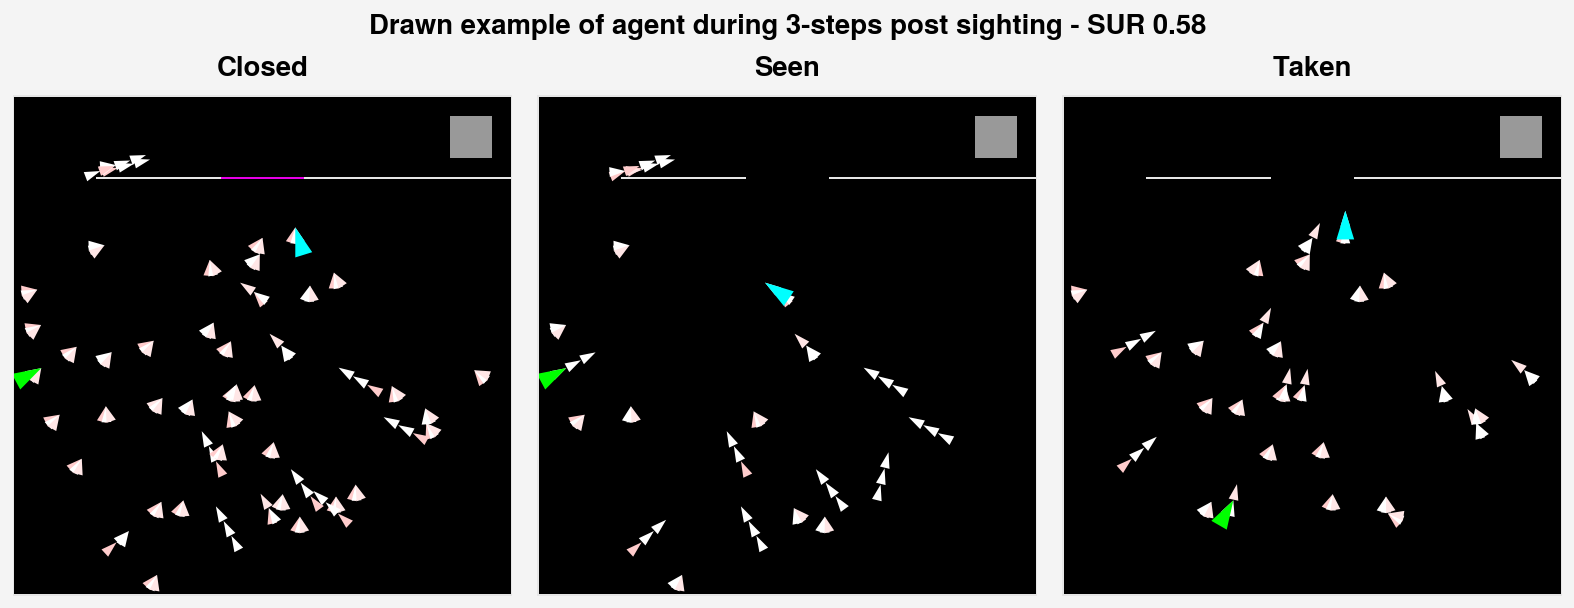

In [177]:

p = 0.4
t = 8
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
angle = np.vstack(res['angle'])
color = vision_decision_coloring(vis, avail, used, end=3)

sur = np.sum(used) / 50
silscore, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)


c_p = pos[color == 0]
s_p = pos[color == 1]
t_p = pos[color == 2]
c_a = angle[color == 0]
s_a = angle[color == 1]
t_a = angle[color == 2]

set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=3)

draw_trajectory(c_p, c_a, ax=ax[0])
draw_trajectory(s_p, s_a, ax=ax[1])
draw_trajectory(t_p, t_a, ax=ax[2])

draw_shortcut_maze(ax=ax[0], shortcut_open=False)
draw_shortcut_maze(ax=ax[1])
draw_shortcut_maze(ax=ax[2])

leftlabels = ['Closed', 'Seen', 'Taken']
ax.format(toplabels=leftlabels,
         suptitle=f'Drawn example of agent during 3-steps post sighting - SUR {sur:.2f}',
         xlim=[0, 300], ylim=[0, 300])

pplt.rc.reset()

In [165]:

p = 0.4
t = 1
key = f'{p}_{t}'
chk = 5
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
pos = np.vstack(res['pos'])
angle = np.vstack(res['angle'])
color = vision_decision_coloring(vis, avail, used, end=3)

sur = np.sum(used) / 50
silscore, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)


c_p = pos[color == 0]
s_p = pos[color == 1]
t_p = pos[color == 2]
c_a = angle[color == 0]
s_a = angle[color == 1]
t_a = angle[color == 2]

set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=3)

draw_trajectory(c_p, c_a, ax=ax[0])
draw_trajectory(s_p, s_a, ax=ax[1])
draw_trajectory(t_p, t_a, ax=ax[2])

draw_shortcut_maze(ax=ax[0], shortcut_open=False)
draw_shortcut_maze(ax=ax[1])
draw_shortcut_maze(ax=ax[2])

leftlabels = ['Closed', 'Seen', 'Taken']
ax.format(xlabel='Silhouette score', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle=f'Drawn example of agent during 3-steps post sighting - SUR {sur:.2f}, CvS Wasserstein {silscore:.2f}',
         xlim=[0, 300], ylim=[0, 300])

pplt.rc.reset()

In [169]:
p = 0.4
t = 8
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
pos = res['pos']
angle = res['angle']

set_trajectory_plot_style()
fig, ax = pplt.subplots(nrows=8, ncols=8)

for i in range(64):
    draw_trajectory(pos[i], angle[i], ax=ax[i])
    draw_shortcut_maze(shortcut_open=avail[i][0], ax=ax[i])
    
pplt.rc.reset()

In [210]:
df[(df['sur'] < 0.3) & (df['sur'] > 0.1)]

key  chk  none_vs_vis  none_vs_taken  vis_vs_taken   sur
1   0.1_3    2     0.184537       0.113607      0.050347  0.12
3   0.1_0    5     0.306546       0.232408      0.147040  0.12
6   0.1_6    6     0.233048       0.133876      0.103440  0.12
9   0.1_0    8     0.175449       0.298040      0.180738  0.20
10  0.1_3    8     0.257958       0.242975      0.153658  0.14
11  0.1_4    8     0.236820       0.268209      0.116516  0.12
13  0.1_0    9     0.217251       0.302285      0.164765  0.14
15  0.1_0   10     0.186213       0.294451      0.181900  0.14
16  0.1_3   10     0.250841       0.259177      0.208030  0.12
18  0.1_6   10     0.231263       0.274188      0.156747  0.18
20  0.4_3    1     0.142303       0.171754      0.081504  0.14
21  0.4_8    1     0.154388       0.170989      0.084366  0.18
22  0.4_1    2     0.177242       0.194918      0.139504  0.14
23  0.4_3    2     0.169784       0.208464      0.124493  0.18
24  0.4_4    2     0.110529       0.109120      0.058746  0.18
25  0.4_5    2     0.218557       0.231365      0.097713  0.18
26  0.4_6    2     0.179373       0.192046      0.084316  0.16
27  0.4_8    2     0.168938       0.209682      0.111726  0.16
28  0.4_0    3     0.176811       0.148683      0.084249  0.14
29  0.4_1    3     0.159925       0.222521      0.157450  0.12
30  0.4_3    3     0.200732       0.226845      0.134812  0.20
31  0.4_4    3     0.147862       0.172843      0.122469  0.12
32  0.4_5    3     0.232490       0.320898      0.121647  0.22
33  0.4_6    3     0.198349       0.228879      0.130809  0.20
34  0.4_8    3     0.203168       0.249198      0.152614  0.22
35  0.4_9    3     0.214398       0.224651      0.099172  0.20
36  0.4_0    4     0.163106       0.186006      0.077798  0.14
37  0.4_1    4     0.160146       0.212904      0.141891  0.16
38  0.4_3    4     0.197684       0.241949      0.158319  0.20
39  0.4_5    4     0.258710       0.297131      0.133091  0.20
40  0.4_6    4     0.181644       0.246019      0.165837  0.26
42  0.4_9    4     0.249203       0.266060      0.085950  0.18
43  0.4_0    5     0.197774       0.243556      0.153214  0.12
46  0.4_3    5     0.198123       0.254658      0.169612  0.28
47  0.4_4    5     0.160629       0.238488      0.158272  0.14
48  0.4_5    5     0.243378       0.271460      0.159036  0.18
49  0.4_6    5     0.220552       0.255431      0.164451  0.20
51  0.4_9    5     0.248222       0.304000      0.119433  0.20
52  0.4_0    6     0.179650       0.253757      0.140696  0.16
54  0.4_2    6     0.202392       0.229331      0.143333  0.14
56  0.4_4    6     0.169463       0.266163      0.166862  0.22
57  0.4_5    6     0.235068       0.263638      0.163886  0.26
61  0.4_9    6     0.247247       0.298582      0.136284  0.18
64  0.4_2    7     0.189487       0.236750      0.198896  0.12
67  0.4_5    7     0.251581       0.288667      0.137119  0.18
72  0.4_0    8     0.210756       0.257449      0.170940  0.26
88  0.4_9    9     0.269132       0.337940      0.178673  0.22

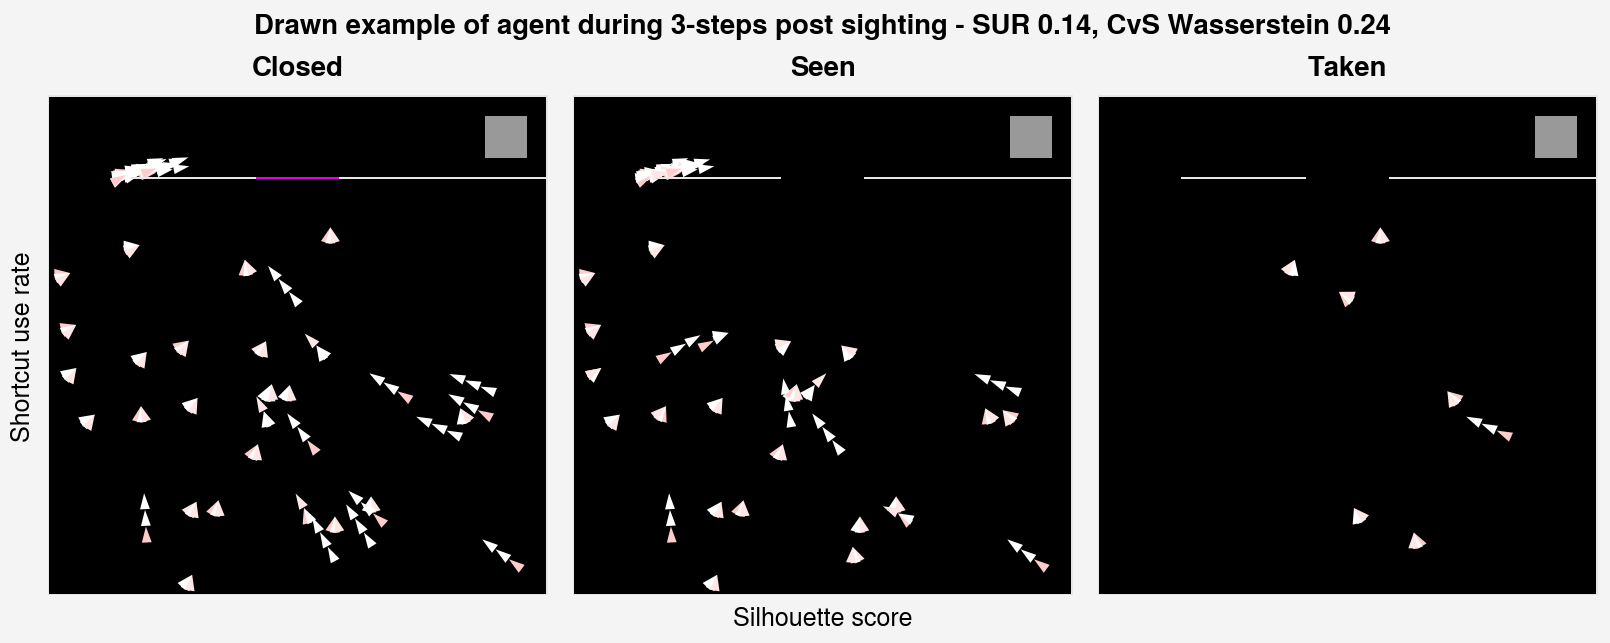

In [216]:

p = 0.1
t = 3
key = f'{p}_{t}'
chk = 8
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
color = vision_decision_coloring(vis, avail, used, end=3)
pos,  angle = res['pos'], res['angle']
sur = np.sum(used) / 50
silscore, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)


c_p = np.vstack(pos)[color == 0]
s_p = np.vstack(pos)[color == 1]
t_p = np.vstack(pos)[color == 2]
c_a = np.vstack(angle)[color == 0]
s_a = np.vstack(angle)[color == 1]
t_a = np.vstack(angle)[color == 2]

set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=3)

draw_trajectory(c_p, c_a, ax=ax[0], color_first=False, color_last=False)
draw_trajectory(s_p, s_a, ax=ax[1], color_first=False, color_last=False)
draw_trajectory(t_p, t_a, ax=ax[2], color_first=False, color_last=False)

draw_shortcut_maze(ax=ax[0], shortcut_open=False)
draw_shortcut_maze(ax=ax[1])
draw_shortcut_maze(ax=ax[2])


leftlabels = ['Closed', 'Seen', 'Taken']
ax.format(xlabel='Silhouette score', ylabel='Shortcut use rate',
         toplabels=leftlabels,
         suptitle=f'Drawn example of agent during 3-steps post sighting - SUR {sur:.2f}, CvS Wasserstein {silscore:.2f}',
         xlim=[0, 300], ylim=[0, 300])

pplt.rc.reset()

In [152]:
fa = pickle.load(open('data/shortcut/forced_actions', 'rb'))
forced_actions = fa['forced_actions']
seed = fa['seed']
p = 0.4
t = 0
model, obs_rms = load_chk(f'shortcut_wc1.5p{p}', subdir='shortcut_wc', trial=t, chk=460)

res = forced_action_evaluate(model, obs_rms, env_name='ShortcutNav-v0', 
                       env_kwargs={'character_reset_pos': 3,
                                  'shortcut_probability': 0.5,
                                  'wall_colors': 1.5},
                   seed=seed, with_activations=True, data_callback=shortcut_visdata_callback,
                    num_episodes=100, forced_actions=forced_actions)
pos = res['data']['pos']
angle = res['data']['angle']

In [96]:

p = 0.4
t = 1
key = f'{p}_{t}'
chk = 7
shortcut_res = activs[key]
res = shortcut_res[chk]
vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
activ = np.vstack(activ)
activ2d = res['activ2d']
ep_lens = get_ep_lens(res['pos'])
activ2d = ep_split_res(activ2d, ep_lens)
color = vision_decision_coloring(vis, avail, used, end=3)
sur = np.sum(used) / 50
silscore, _, _ = two_cloud_wasserstein(activ[color==0], activ[color==2], all_data=activ)

s_firsts = []
t_firsts = []

s_idxs = []
t_idxs = []

for i in range(50):
    v = vis[i]
    first = np.argmax(v)
    
    if used[i+50][0]:
        t_idxs.append(i)
        t_firsts.append(first)
    else:
        s_idxs.append(i)
        s_firsts.append(first)

In [63]:
print(len(s_p))

9


(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

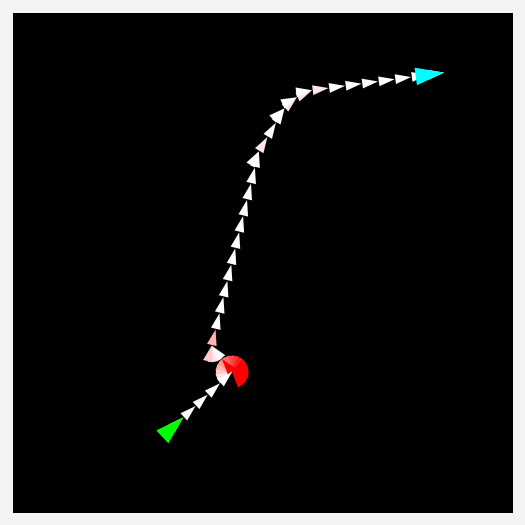

In [69]:
draw_trajectory(t_p[0], t_a[0])

In [89]:
%run trajectories

In [95]:
ep_lens = 

5232

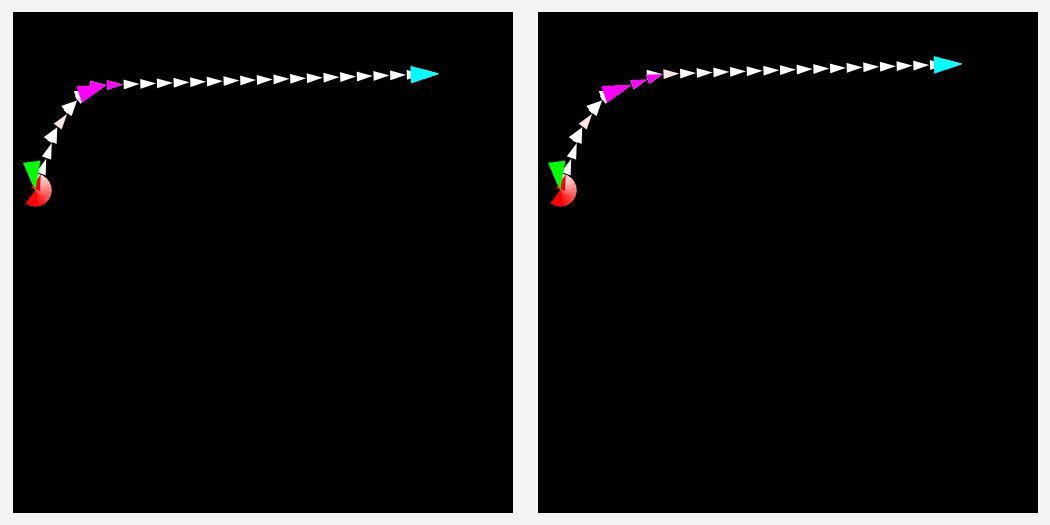

In [116]:
ep = 3
idx = s_idxs[ep]
first = s_firsts[ep]

set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=2)

draw_trajectory(pos[idx+50], angle[idx+50], ax=ax[0])
draw_trajectory(pos[idx], angle[idx], ax=ax[1])

draw_trajectory(pos[idx+50][first:first+3], angle[idx+50][first:first+3], ax=ax[0], 
                color=[1, 0, 1, 1], color_last=False)
draw_trajectory(pos[idx][first:first+3], angle[idx][first:first+3], ax=ax[1], 
                color=[1, 0, 1, 1], color_last=False)


pplt.rc.reset()

fig, ax = pplt.subplots(ncols=2)
for i in range(2):
    ax[i].scatter(np.vstack(activ2d)[:, 0], 
                  np.vstack(activ2d)[:, 1], alpha=0.01)

ax[0].scatter(activ2d[idx+50][:, 0], activ2d[idx+50][:, 1], alpha=0.3)
ax[1].scatter(activ2d[idx][:, 0], activ2d[idx][:, 1], alpha=0.3)


ax[0].scatter(activ2d[idx+50][first:first+3, 0], activ2d[idx+50][first:first+3, 1])
ax[1].scatter(activ2d[idx][first:first+3, 0], activ2d[idx][first:first+3, 1])

ax[0].scatter(activ2d[idx+50][first-1:first, 0], activ2d[idx+50][first-1:first, 1])
ax[1].scatter(activ2d[idx][first-1:first, 0], activ2d[idx][first-1:first, 1])


In [82]:
ep = 11
set_trajectory_plot_style()
fig, ax = pplt.subplots(ncols=2)

draw_trajectory(t_p[ep], t_a[ep], ax=ax[0])
draw_trajectory(ct_p[ep], ct_a[ep], ax=ax[1])

pplt.rc.reset()

In [48]:
set_trajectory_plot_style()
draw_trajectory(c_p, c_a)
pplt.rc.reset()

# 3 step corresponding episodes

Even with wasserstein metrics, we still see the same problem of corresponding episodes not showing positive correlation with performance

In [56]:
activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))


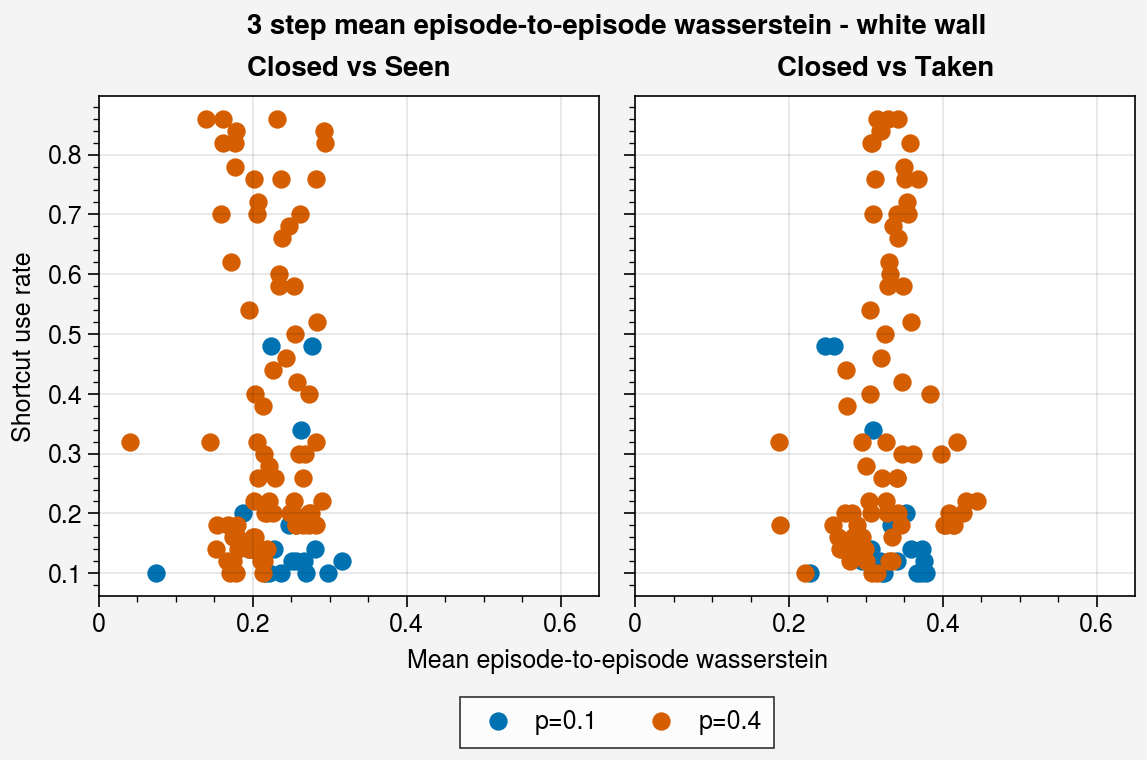

In [60]:
# only consider agents that used shortcut at least 5 times

probs = [0.1, 0.4]
# probs = [0.4]
trials = range(10)

all_scores = {
    0.1: {'none_vs_vis': [], 'none_vs_taken': [], 'surs': []},
    0.4: {'none_vs_vis': [], 'none_vs_taken': [], 'surs': []}
}

start = 0
end = 3

for chk in range(len(chks)):
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used

    # for t in trials:
    for p, t in itertools.product(probs, trials):
        key = f'{p}_{t}'
        shortcut_res = activs[key]

        res = shortcut_res[chk]
        vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
        if np.sum(used) < 5:
            continue

        activ_c_s = [] #closed where shortcut was used when open
        activ_c_l = [] #closed where long path was used when open
        activ_l = [] #long path
        activ_s = [] #shortcut

        # get ep activations from closed shortcut eps where when open agent used shortcut
        for i in range(50):
            v = vis[i]
            first = np.argmax(v)
            if used[i+50][0]:
                activ_c_s.append(activ[i][first+start:first+end])
                activ_s.append(activ[i+50][first+start:first+end])
            else:
                activ_c_l.append(activ[i][first+start:first+end])
                activ_l.append(activ[i+50][first+start:first+end])

        s_scores = []
        l_scores = []
        
        activ = np.vstack(activ)

        # Note we might get a bug in the case of 100% shortcut use rate but no agent has had that yet
        #  - in that case, we can probably just not count the l_score there
        for i in range(len(activ_s)):
            s_scores.append(two_cloud_wasserstein(activ_s[i], activ_c_s[i], all_data=activ)[0])
        for i in range(len(activ_l)):
            l_scores.append(two_cloud_wasserstein(activ_l[i], activ_c_l[i], all_data=activ)[0])
            
        
        none_vs_vis.append(np.mean(l_scores))
        none_vs_taken.append(np.mean(s_scores))
    
        
        # Uncomment the below to get individual episodes to plot scatter with
        all_scores[p]['none_vs_vis'].append(np.mean(l_scores))
        all_scores[p]['none_vs_taken'].append(np.mean(s_scores))
        all_scores[p]['surs'].append(np.sum(used) / 50)
    
    

fig, ax = pplt.subplots(nrows=1, ncols=2)
legend_pts = []
for p in probs:
    keys = ['none_vs_vis', 'none_vs_taken']
    surs = all_scores[p]['surs']
    for i, key in enumerate(keys):
        scores = all_scores[p][key]
        pts = ax[i].scatter(scores, surs, label=f'p={p}')
        if i == 0:
            legend_pts.append(pts)

toplabels = ['Closed vs Seen', 'Closed vs Taken']
ax.format(xlabel='Mean episode-to-episode wasserstein', ylabel='Shortcut use rate',
         toplabels=toplabels,
         suptitle='3 step mean episode-to-episode wasserstein - white wall',
         xlim=[0, 0.65])
fig.legend(legend_pts, loc='b')

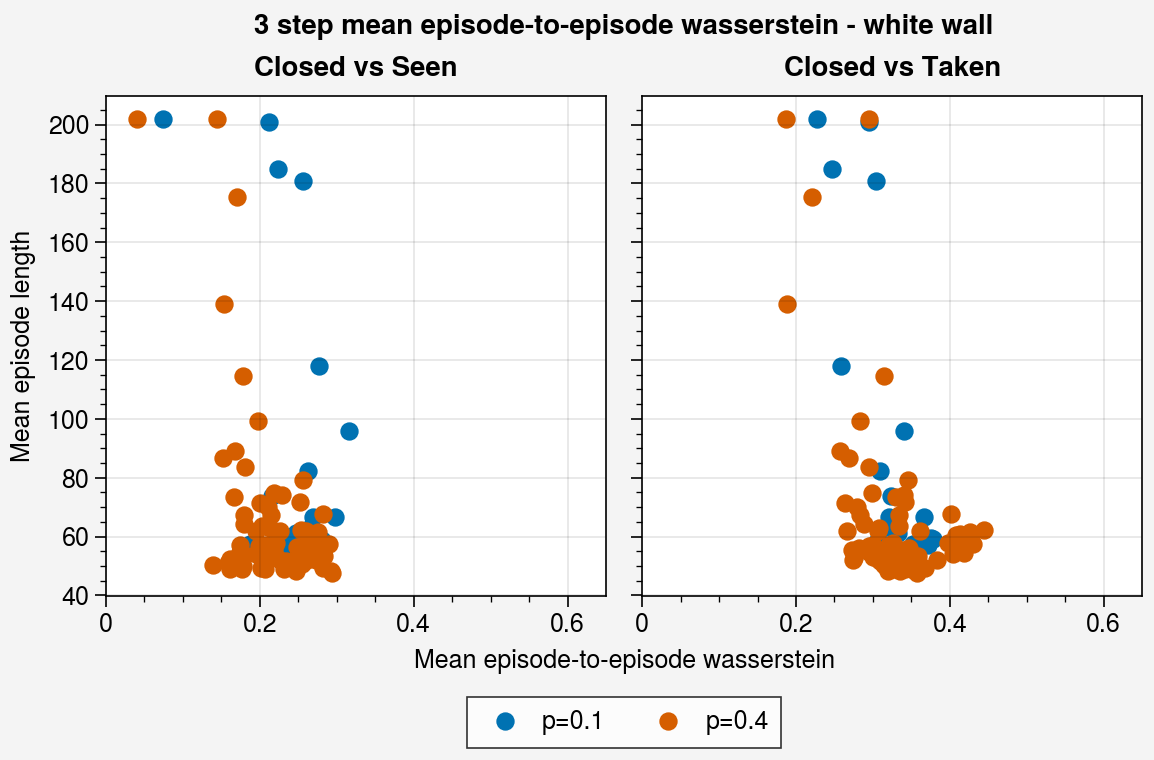

In [56]:
# only consider agents that used shortcut at least 5 times

probs = [0.1, 0.4]
# probs = [0.4]
trials = range(10)

all_scores = {
    0.1: {'none_vs_vis': [], 'none_vs_taken': [], 'surs': [], 'lens': []},
    0.4: {'none_vs_vis': [], 'none_vs_taken': [], 'surs': [], 'lens': []}
}

start = 0
end = 3

for chk in range(len(chks)):
    none_vs_vis = [] #no shortcut avail vs shortcut avail but not used
    none_vs_taken = [] #no shortcut avail vs shortcut used
    vis_vs_taken = [] #shortcut avail but not used vs shortcut used

    # for t in trials:
    for p, t in itertools.product(probs, trials):
        key = f'{p}_{t}'
        shortcut_res = activs[key]

        res = shortcut_res[chk]
        vis, avail, used, activ = res['vis'], res['shortcut_avail'], res['shortcut_used'], res['activ']
        if np.sum(used) < 5:
            continue

        activ_c_s = [] #closed where shortcut was used when open
        activ_c_l = [] #closed where long path was used when open
        activ_l = [] #long path
        activ_s = [] #shortcut

        # get ep activations from closed shortcut eps where when open agent used shortcut
        for i in range(50):
            v = vis[i]
            first = np.argmax(v)
            if used[i+50][0]:
                activ_c_s.append(activ[i][first+start:first+end])
                activ_s.append(activ[i+50][first+start:first+end])
            else:
                activ_c_l.append(activ[i][first+start:first+end])
                activ_l.append(activ[i+50][first+start:first+end])

        s_scores = []
        l_scores = []
        
        activ = np.vstack(activ)

        # Note we might get a bug in the case of 100% shortcut use rate but no agent has had that yet
        #  - in that case, we can probably just not count the l_score there
        for i in range(len(activ_s)):
            s_scores.append(two_cloud_wasserstein(activ_s[i], activ_c_s[i], all_data=activ)[0])
        for i in range(len(activ_l)):
            l_scores.append(two_cloud_wasserstein(activ_l[i], activ_c_l[i], all_data=activ)[0])
            
        
        none_vs_vis.append(np.mean(l_scores))
        none_vs_taken.append(np.mean(s_scores))
    
        
        # Uncomment the below to get individual episodes to plot scatter with
        all_scores[p]['none_vs_vis'].append(np.mean(l_scores))
        all_scores[p]['none_vs_taken'].append(np.mean(s_scores))
        all_scores[p]['surs'].append(np.sum(used) / 50)
        all_scores[p]['lens'].append(np.mean(get_ep_lens(res['pos'])))
        
    
    

fig, ax = pplt.subplots(nrows=1, ncols=2)
legend_pts = []
for p in probs:
    keys = ['none_vs_vis', 'none_vs_taken']
    surs = all_scores[p]['lens']
    for i, key in enumerate(keys):
        scores = all_scores[p][key]
        pts = ax[i].scatter(scores, surs, label=f'p={p}')
        if i == 0:
            legend_pts.append(pts)

toplabels = ['Closed vs Seen', 'Closed vs Taken']
ax.format(xlabel='Mean episode-to-episode wasserstein', ylabel='Mean episode length',
         toplabels=toplabels,
         suptitle='3 step mean episode-to-episode wasserstein - white wall',
         xlim=[0, 0.65])
fig.legend(legend_pts, loc='b')

# Optimistic Clustering wasserstein

Observing how optimistic cluster Wasserstein scores correlate with performance and change over training

In [181]:
wassersteins = pickle.load(open('data/shortcut/wc1.5_copiedv2_moreagents/green_orange_wassersteins', 'rb'))
sur_activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

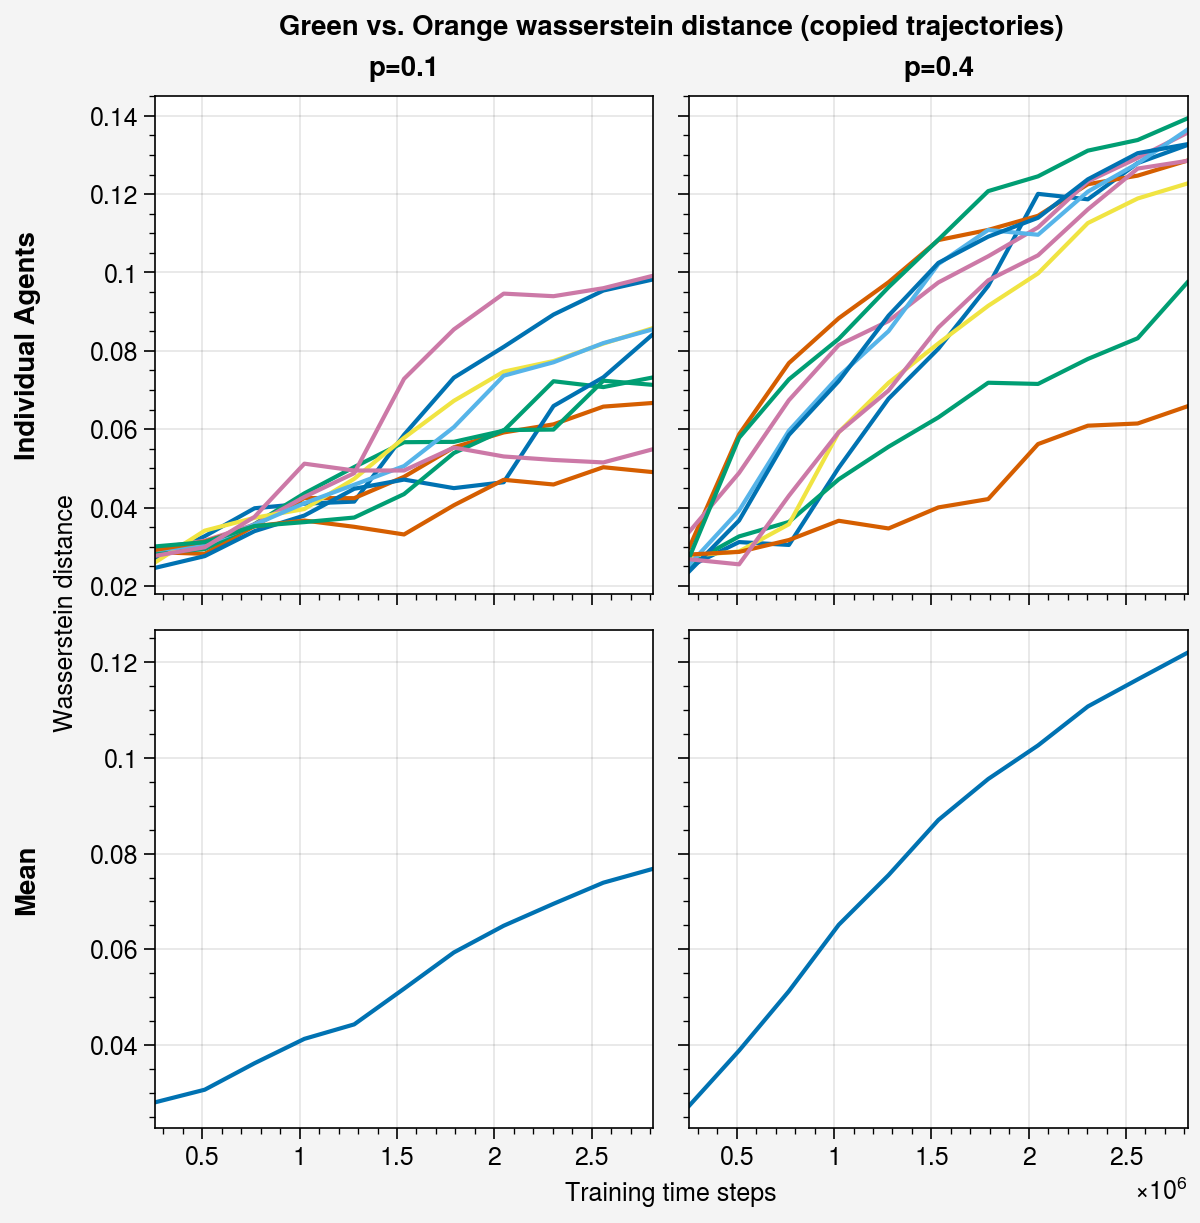

In [179]:
probs = [0.1, 0.4]
trials = range(10)
chks = np.arange(40, 470, 40)

fig, ax = pplt.subplots(ncols=2, nrows=2, figwidth=6)
for i, p in enumerate(probs):
    if i == 0:
        x = chks*64*100/1000000
    else:
        x = chks*64*100
    
    sil = []
    for t in trials:
        ax[0, i].plot(x, silscores[f'{p}_{t}'])
        sil.append(silscores[f'{p}_{t}'])
        
    mean_sil = []
    for j in range(len(sil[0])):
        s = np.array(sil)[:, j]
        mean_sil.append(np.mean(s[~np.isnan(s)]))
    ax[1, i].plot(x, mean_sil)
    
ax.format(toplabels=[f'p={p}' for p in probs],
          leftlabels=['Individual Agents', 'Mean'],
          xlabel='Training time steps', ylabel='Wasserstein distance',
          suptitle='Green vs. Orange wasserstein distance (copied trajectories)')

### All cluster pairings correlated with performance

#### Copied wassersteins

#### Policy wassersteins

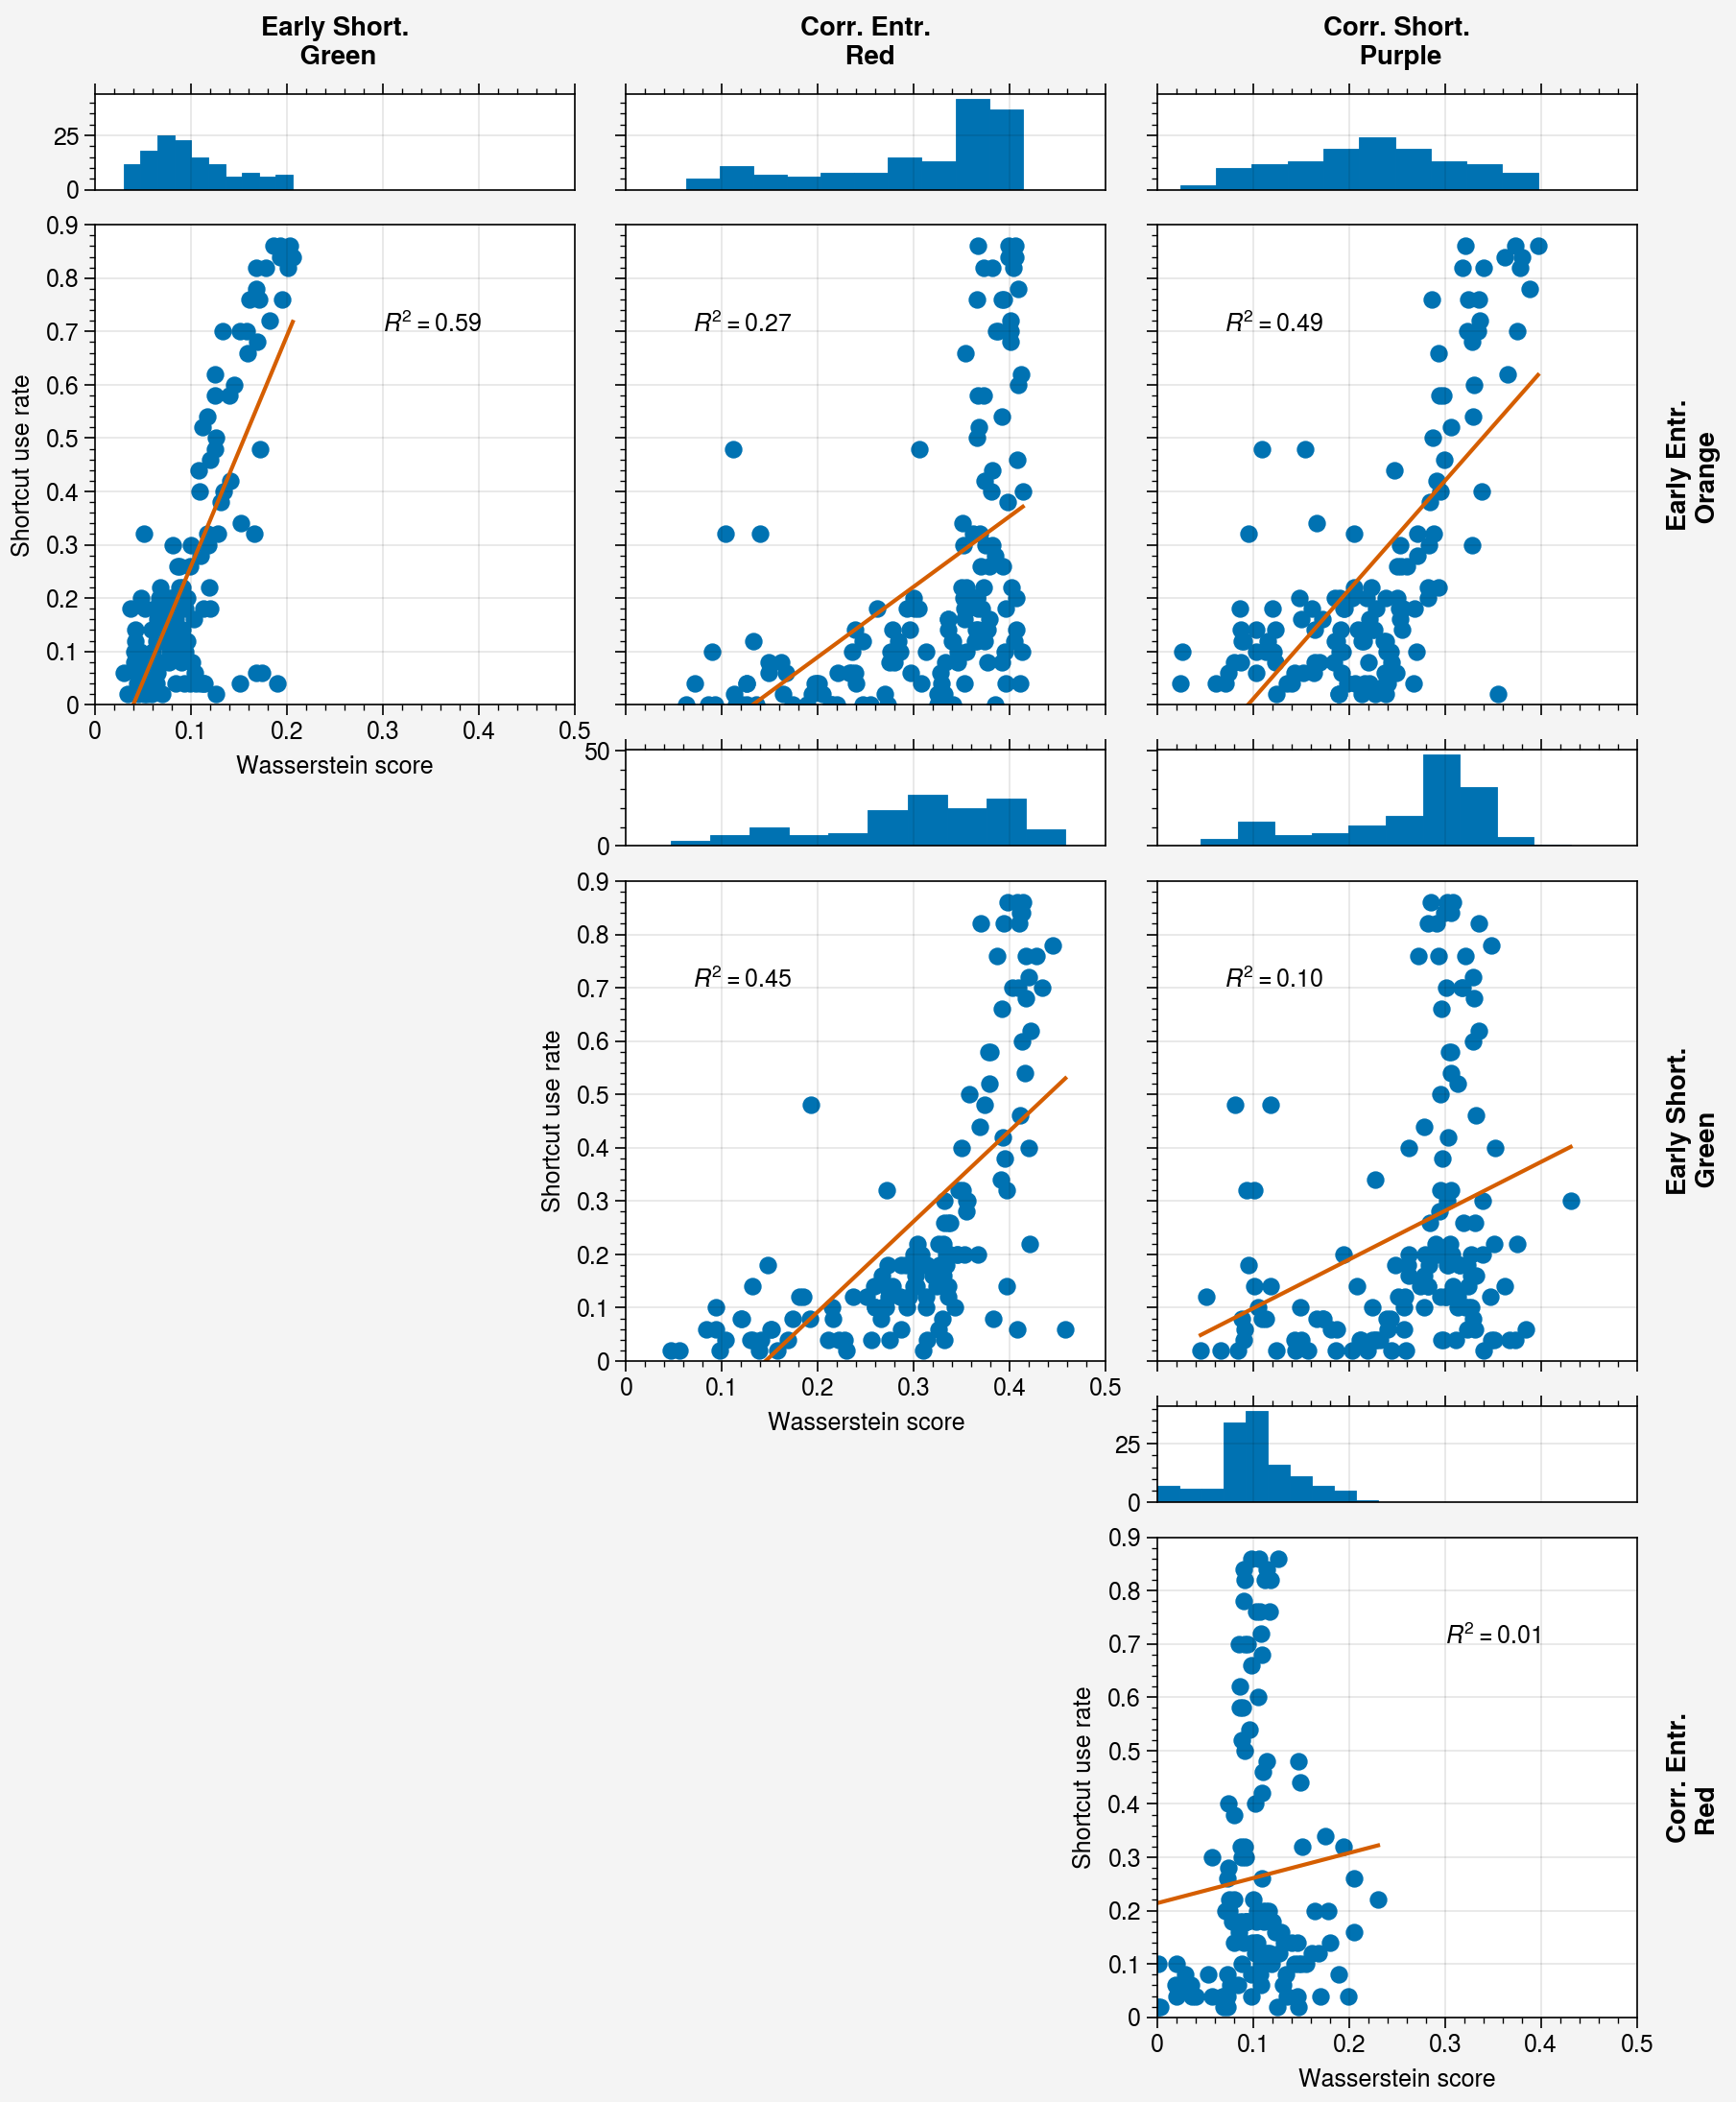

In [40]:
wassersteins = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/pair_wassersteins', 'rb'))
sur_activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

probs = [0.1, 0.4]
trials = range(10)

array = [
    [1, 2, 3],
    [0, 4, 5],
    [0, 0, 6],
]
fig, ax = pplt.subplots(array)
tax = ax.panel_axes('t')

count = 0
for i, j in itertools.combinations(range(4), 2):
    was = []
    surs = []
    ep_lens = []
    for p, t in itertools.product(probs, trials):
        key = f'{p}_{t}'

        was.append(wassersteins[key][:, i, j])
        sur = []
        ep_len = []
        for chk in range(len(chks)):
            sur.append(np.sum(sur_activs[key][chk]['shortcut_used']) / 50)
            ep_len.append(np.mean([len(p) for p in sur_activs[key][chk]['pos']]))
        surs.append(sur)
        ep_lens.append(ep_len)
    was = np.array(was).flatten()
    surs = np.array(surs).flatten()
    ep_lens = np.array(ep_lens).flatten()
    
    ax[count].scatter(was, surs)
    x, y, r2 = linear_bestfit(was[~np.isnan(was)], surs[~np.isnan(was)])
    ax[count].plot(x, y)
    
    x = 0.3 if count in [0, 5] else 0.07
    ax[count].text(x, 0.7, f'$R^2={r2:.2f}$')
    
    tax[count].hist(was)
    count += 1
    
labels = ['Early Entr.\n Orange', 'Early Short.\n Green','Corr. Entr.\n Red', 'Corr. Short.\n Purple']
ax.format(toplabels=labels[1:],
         rightlabels=labels[:-1],
         xlabel='Wasserstein score',
         ylabel='Shortcut use rate',
         xlim=[0, 0.5], ylim=[0, 0.9])



#### Copied open only

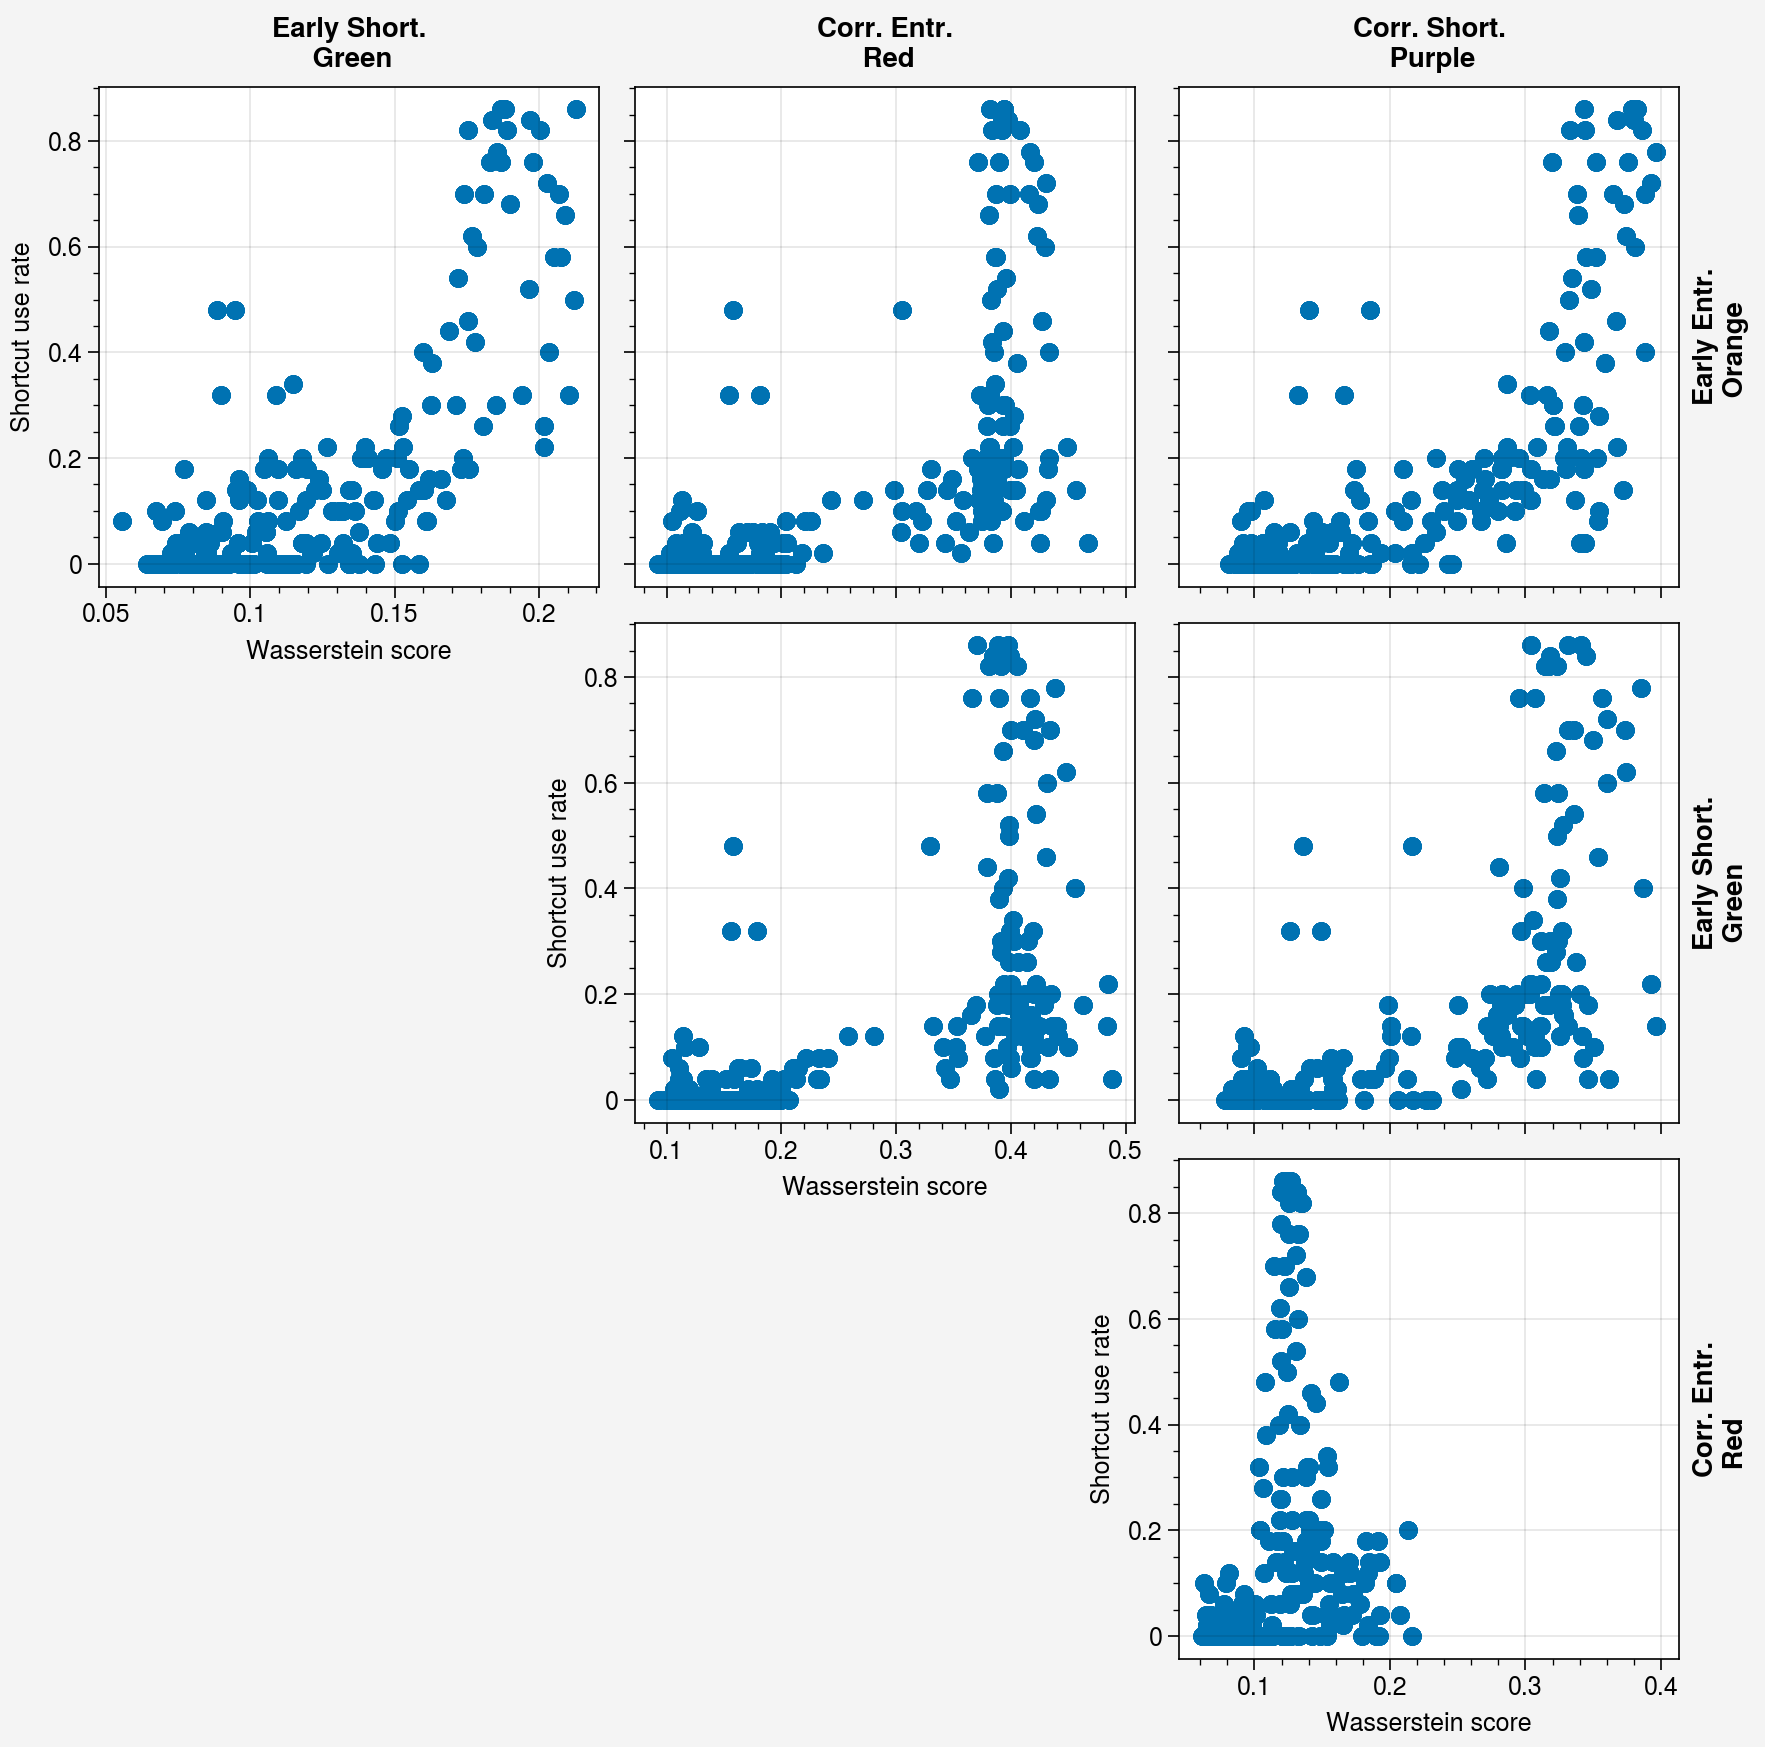

In [18]:
wassersteins = pickle.load(open('data/shortcut/wc1.5_copiedv2_moreagents/pair_wassersteins_openshortcut', 'rb'))
sur_activs = pickle.load(open('data/shortcut/wc1.5_policy_moreagents/shared1_activ', 'rb'))

probs = [0.1, 0.4]
trials = range(10)

array = [
    [1, 2, 3],
    [0, 4, 5],
    [0, 0, 6],
]
fig, ax = pplt.subplots(array)

count = 0
for i, j in itertools.combinations(range(4), 2):
    was = []
    surs = []
    ep_lens = []
    for p, t in itertools.product(probs, trials):
        for t in trials:
            key = f'{p}_{t}'

            was.append(wassersteins[key][:, i, j])
            sur = []
            ep_len = []
            for chk in range(len(chks)):
                sur.append(np.sum(sur_activs[key][chk]['shortcut_used']) / 50)
                ep_len.append(np.mean([len(p) for p in sur_activs[key][chk]['pos']]))
            surs.append(sur)
            ep_lens.append(ep_len)
    was = np.array(was).flatten()
    surs = np.array(surs).flatten()
    ep_lens = np.array(ep_lens).flatten()

    ax[count].scatter(was, surs)
    count += 1
labels = ['Early Entr.\n Orange', 'Early Short.\n Green','Corr. Entr.\n Red', 'Corr. Short.\n Purple']
ax.format(toplabels=labels[1:],
         rightlabels=labels[:-1],
         xlabel='Wasserstein score',
         ylabel='Shortcut use rate')



# Post vision activation divergence